# Module 4 Final Project - Time Series and Zillow Dataset
* Student name: Krystian Dennis
* Student pace: Full Time
* Scheduled project review date/time: 14 October 2019 14:00pm
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://medium.com/@krystiandennis/creating-choropleth-maps-from-time-series-data-in-python-using-folium-56d8a35b2096

## Business Understanding

Aries Real Estate Investors buys and rehabs homes in high-growth urban areas. Homes are purchased to be renovated and sold (or flipped). Properties held longer than 30 days past end of renovation are rented for 3-5 years, then re-entered into the housing market. Aries is looking to expand its offering to buyers with a wider range of budgets to capture more market share. To make sure that new areas of investment are ideal, 5 zipcodes have been identified using the following criteria:

* Zipcodes are located in the Top 5 in 2019 Market rankings for Overall Real Estate Prospects according to Price Waterhouse Cooper's Emerging Trends in Real Estate 2019 Report
* Areas have demonstrated 30% or greater Return On Investment in the last 10 years
* Risk has been mitigated by selecting zipcodes in several geographical areas
* Price and return dispersion (measured by coefficient of variation) kept to minimum to lower risk

## Zillow Dataset

Zillow is a top real estate marketplace that has a dedicated research team to provide accurate housing data and unbiased insights to home buyers and home sellers alike. The dataset contains historical sales price data back to 1996 for the United States. 

## Import Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

from fbprophet import Prophet as proph
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import folium

import warnings
warnings.filterwarnings('ignore')

## Import and Explore Data

In [2]:
df = pd.read_csv("zillow_data.csv")
display(df.head())
display(df.info())
display(round(df.describe(),2))
np.shape(df)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


None

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.00,14723.00,14723.00,13684.00,13684.00,13684.00,13684.00,13684.00,13684.00,13684.00,...,14723.00,14723.00,14723.00,14723.00,14723.00,14723.00,14723.00,14723.00,14723.00,14723.00
mean,81075.01,48222.35,7362.00,118299.12,118419.04,118537.42,118653.07,118780.25,118927.53,119120.52,...,273335.39,274865.77,276464.62,278033.19,279520.86,281095.32,282657.06,284368.69,286511.38,288039.94
std,31934.12,29359.33,4250.31,86002.51,86155.67,86309.23,86467.95,86650.94,86872.08,87151.85,...,360398.42,361467.76,362756.27,364460.95,365600.33,367045.39,369572.74,371773.91,372461.23,372054.40
min,58196.00,1001.00,1.00,11300.00,11500.00,11600.00,11800.00,11800.00,12000.00,12100.00,...,14400.00,14500.00,14700.00,14800.00,14500.00,14300.00,14100.00,13900.00,13800.00,13800.00
25%,67174.50,22101.50,3681.50,68800.00,68900.00,69100.00,69200.00,69375.00,69500.00,69600.00,...,126900.00,127500.00,128200.00,128700.00,129250.00,129900.00,130600.00,131050.00,131950.00,132400.00
50%,78007.00,46106.00,7362.00,99500.00,99500.00,99700.00,99700.00,99800.00,99900.00,99950.00,...,188400.00,189600.00,190500.00,191400.00,192500.00,193400.00,194100.00,195000.00,196700.00,198100.00
75%,90920.50,75205.50,11042.50,143200.00,143300.00,143225.00,143225.00,143500.00,143700.00,143900.00,...,305000.00,306650.00,308500.00,309800.00,311700.00,313400.00,315100.00,316850.00,318850.00,321100.00
max,753844.00,99901.00,14723.00,3676700.00,3704200.00,3729600.00,3754600.00,3781800.00,3813500.00,3849600.00,...,18889900.00,18703500.00,18605300.00,18569400.00,18428800.00,18307100.00,18365900.00,18530400.00,18337700.00,17894900.00


(14723, 272)

In [3]:
df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
              ... 
2015-11          0
2015-12          0
2016-01          0
2016-02          0
2016-03          0
2016-04          0
2016-05          0
2016-06          0
2016-07          0
2016-08          0
2016-09          0
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08     

In [4]:
#backfill missing data
df = df.fillna(df.ffill())

In [5]:
df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
             ..
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int6

## EDA and Visualization

In [6]:
#create State dataframe
states = df.groupby(['State']).mean()
states.reset_index(inplace=True)
states.head()

,State,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,AK,111822.214286,99616.785714,6321.035714,128382.142857,128832.142857,129253.571429,129639.285714,130028.571429,130367.857143,...,317921.428571,318610.714286,319382.142857,320185.714286,321378.571429,322657.142857,323775.000000,324167.857143,323692.857143,323046.428571
1,AL,73606.803279,35779.169399,7580.245902,91410.928962,91716.393443,92029.508197,92342.076503,92667.759563,93006.557377,...,149255.191257,149675.956284,150125.136612,150537.704918,150969.945355,151629.508197,152402.732240,153625.683060,155504.371585,157033.879781
2,AR,92528.914286,72470.733333,7381.476190,70645.714286,70795.238095,70921.904762,71047.619048,71165.714286,71297.142857,...,131952.380952,132379.047619,132778.095238,132973.333333,133020.000000,133188.571429,133522.857143,134456.190476,136192.380952,137620.000000
3,AZ,127652.643478,85506.465217,5017.873913,114876.086957,115221.739130,115579.130435,115943.043478,116328.695652,116737.826087,...,257896.086957,259598.260870,261243.043478,262884.347826,264369.130435,265908.260870,267327.826087,268714.782609,270488.695652,271952.173913
4,CA,99003.562092,93308.559641,5070.638889,197564.705882,197476.470588,197394.852941,197330.065359,197326.470588,197405.637255,...,692367.156863,697869.607843,704045.669935,710515.114379,716760.866013,723263.480392,729496.405229,735525.980392,742146.323529,746329.084967


In [7]:
#calculate ROI over last 10 years
states['ROI 10 YR'] = ((states['2018-04']-states['2008-04'])/states['2008-04'])
states['% Growth 10 YR'] = ((states['2018-04']-states['2008-04'])/states['2008-04'])*100
#using std, coefficient of variation as a measure of volatility and risk
#smaller coefficient of variation = smaller risk
states['Risk'] = states.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)/states.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)

In [8]:
ROImap = folium.Map(location=[35, -80], zoom_start=3)
ROImap.choropleth(geo_data='us-states.json', data=states, columns=['State', 'ROI 10 YR'], 
               key_on='feature.id', fill_color='PuBuGn', fill_opacity=0.7, line_opacity=0.2, 
               legend_name='Average Return on Investment')
ROImap

In [9]:
#calculate ROI over last 10 years
df['ROI 10 YR'] = ((df['2018-04']-df['2008-04'])/df['2008-04'])
df['% Growth 10 YR'] = ((df['2018-04']-df['2008-04'])/df['2008-04'])*100
#using std, coefficient of variation as a measure of volatility and risk
#smaller coefficient of variation = smaller risk
df['Risk'] = df.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)/df.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)

In [10]:
df_risk = df.Risk.quantile(.6)
df = df[df['Risk'] < df_risk]

In [11]:
#rename RegionName to ZipCode
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)
df.rename(columns={'CountyName':'County'}, inplace=True)
df['ZipCode']=df['ZipCode'].astype(str)
df.reset_index(drop=True)

,RegionID,ZipCode,City,State,Metro,County,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI 10 YR,% Growth 10 YR,Risk
0,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,314100,315000,316600,318100,319600,321100,321800,0.523674,52.367424,0.152680
1,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320400,320800,321200,321200,323000,326900,329900,0.322244,32.224449,0.143950
2,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1291500,1296600,1299000,1302700,1306400,1308500,1307000,0.142383,14.238266,0.237364
3,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120300,120300,120300,120300,120500,121000,121500,-0.053001,-5.300078,0.178326
4,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,161900,162800,162800,162800,162900,163500,164300,0.277605,27.760498,0.142279
5,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,169600,170900,172300,173300,174200,175400,176200,0.316891,31.689088,0.147026
6,74101,37013,Nashville,TN,Nashville,Davidson,15,112400.0,112700.0,113000.0,...,198800,201300,203800,205900,207600,210000,211900,0.412667,41.266667,0.142048
7,74242,37211,Nashville,TN,Nashville,Davidson,18,97900.0,98000.0,98200.0,...,248800,251100,253900,256500,259000,262100,264200,0.686024,68.602425,0.247623
8,92593,78660,Pflugerville,TX,Austin,Travis,19,138900.0,138600.0,138400.0,...,237400,238500,239400,240000,241000,242200,242800,0.393001,39.300057,0.148012
9,92036,77573,League City,TX,Houston,Galveston,23,141400.0,141000.0,140600.0,...,252400,252300,253100,254700,257100,259800,261400,0.338454,33.845366,0.161776


In [12]:
df.head()

,RegionID,ZipCode,City,State,Metro,County,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI 10 YR,% Growth 10 YR,Risk
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,314100,315000,316600,318100,319600,321100,321800,0.523674,52.367424,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320400,320800,321200,321200,323000,326900,329900,0.322244,32.224449,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1291500,1296600,1299000,1302700,1306400,1308500,1307000,0.142383,14.238266,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120300,120300,120300,120300,120500,121000,121500,-0.053001,-5.300078,0.178326
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,161900,162800,162800,162800,162900,163500,164300,0.277605,27.760498,0.142279


In [13]:
df.tail()

,RegionID,ZipCode,City,State,Metro,County,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI 10 YR,% Growth 10 YR,Risk
14704,70763,29915,Bluffton,SC,Hilton Head Island,Beaufort,14705,308000.0,310900.0,313800.0,...,531300,501200,475200,463500,469000,489500,507500,-0.301638,-30.163754,0.249078
14713,59187,3765,Haverhill,NH,Claremont,Grafton,14714,80800.0,80100.0,79400.0,...,121600,122600,123400,124400,125500,126600,127500,-0.061119,-6.111929,0.224286
14714,94711,84781,Pine Valley,UT,St. George,Washington,14715,135900.0,136300.0,136600.0,...,248900,254600,257600,258000,260600,264700,266800,-0.020198,-2.019831,0.205629
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218500,218100,216400,213100,209800,209200,209300,0.058140,5.813953,0.232707
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,126700,128800,130600,131700,132500,133000,133400,0.292636,29.263566,0.182705


In [14]:
cols = df.columns.tolist()

In [15]:
cols = cols[-1:] + cols[:-1]

In [16]:
cols = cols[-1:] + cols[:-1]

In [17]:
cols = cols[-1:] + cols[:-1]
cols[:5]

['ROI 10 YR', '% Growth 10 YR', 'Risk', 'RegionID', 'ZipCode']

In [18]:
df = df[cols]
df.head()

,ROI 10 YR,% Growth 10 YR,Risk,RegionID,ZipCode,City,State,Metro,County,SizeRank,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1,0.523674,52.367424,0.152680,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,0.322244,32.224449,0.143950,91982,77494,Katy,TX,Houston,Harris,3,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,0.142383,14.238266,0.237364,84616,60614,Chicago,IL,Chicago,Cook,4,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,-0.053001,-5.300078,0.178326,93144,79936,El Paso,TX,El Paso,El Paso,5,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,0.277605,27.760498,0.142279,91733,77084,Houston,TX,Houston,Harris,6,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300


In [19]:
columns = df.columns
value_varss = columns[10:]

In [20]:
df = pd.melt(df,id_vars=['City', 'State','ZipCode', 'Metro', 'County','ROI 10 YR'],value_vars=value_varss)
df.rename(columns={'variable':'Time'}, inplace=True)
df.head()

,City,State,ZipCode,Metro,County,ROI 10 YR,Time,value
0,McKinney,TX,75070,Dallas-Fort Worth,Collin,0.523674,1996-04,235700.0
1,Katy,TX,77494,Houston,Harris,0.322244,1996-04,210400.0
2,Chicago,IL,60614,Chicago,Cook,0.142383,1996-04,498100.0
3,El Paso,TX,79936,El Paso,El Paso,-0.053001,1996-04,77300.0
4,Houston,TX,77084,Houston,Harris,0.277605,1996-04,95000.0


In [21]:
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
df.set_index('Time', inplace =True)
df = df.dropna(subset=['value'])
df.groupby('Time').aggregate({'value':'mean'})
df.head()
df.tail()

,City,State,ZipCode,Metro,County,ROI 10 YR,value
Time,,,,,,,
2018-04-01,Bluffton,SC,29915,Hilton Head Island,Beaufort,-0.301638,507500.0
2018-04-01,Haverhill,NH,3765,Claremont,Grafton,-0.061119,127500.0
2018-04-01,Pine Valley,UT,84781,St. George,Washington,-0.020198,266800.0
2018-04-01,Ashfield,MA,1338,Greenfield Town,Franklin,0.058140,209300.0
2018-04-01,Berea,KY,40404,Richmond,Madison,0.292636,133400.0


In [22]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341010 entries, 1996-04-01 to 2018-04-01
Data columns (total 7 columns):
City         object
State        object
ZipCode      object
Metro        object
County       object
ROI 10 YR    float64
value        float64
dtypes: float64(2), object(5)
memory usage: 142.9+ MB


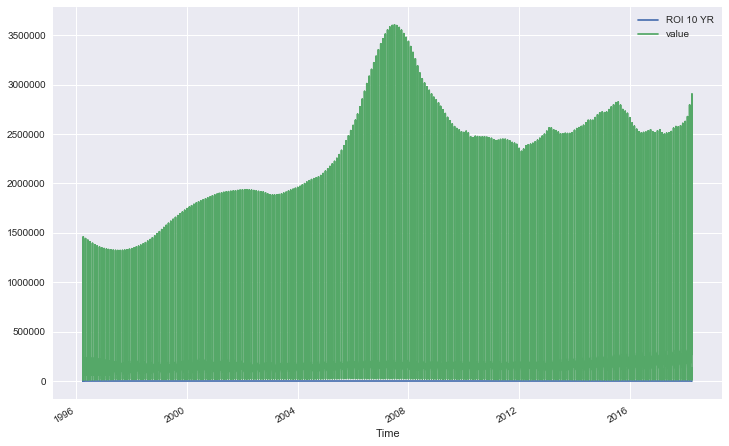

In [23]:
df.plot(kind = 'line', figsize= (12,8))
plt.show()

In [24]:
#create Dallas-Fort Worth dataframe
dallas_fort_worth = df.loc[(df['Metro']=='Dallas-Fort Worth')&(df['State']=='TX')].sort_values(by=['Time','ROI 10 YR'],axis=0, ascending = False)
dallas_fort_worth['value'] = dallas_fort_worth['value'].astype(int)
dallas_fort_worth.head()

,City,State,ZipCode,Metro,County,ROI 10 YR,value
Time,,,,,,,
2018-04-01,Dallas,TX,75218,Dallas-Fort Worth,Dallas,0.830777,358100
2018-04-01,Richardson,TX,75080,Dallas-Fort Worth,Dallas,0.785549,308900
2018-04-01,Farmers Branch,TX,75234,Dallas-Fort Worth,Dallas,0.767372,234000
2018-04-01,Richardson,TX,75081,Dallas-Fort Worth,Dallas,0.737801,267100
2018-04-01,Dallas,TX,75235,Dallas-Fort Worth,Dallas,0.734856,174700


In [25]:
#create Brooklyn. no zipcodes with acceptable risk (variation .5 or below)
brooklyn = df.loc[(df['County']=='Kings')&(df['State']=='NY')].sort_values(by=['Time','ROI 10 YR'],axis=0, ascending = False)
brooklyn['value'] = brooklyn['value'].astype(int)
brooklyn.head()

,City,State,ZipCode,Metro,County,ROI 10 YR,value
Time,,,,,,,


In [26]:
#create Orlando. no zipcodes with acceptable risk (variation .5 or below)
orlando = df.loc[(df['City']=='Orlando')&(df['State']=='FL')].sort_values(by=['Time','ROI 10 YR'],axis=0, ascending = False)
orlando['value'] = orlando['value'].astype(int)
orlando.head()

,City,State,ZipCode,Metro,County,ROI 10 YR,value
Time,,,,,,,


In [27]:
#create Raleigh-Durham
raleigh = df.loc[(df['City']=='Raleigh')&(df['State']=='NC')]
durham = df.loc[(df['City']=='Durham')&(df['State']=='NC')]
raleigh_durham = pd.concat([raleigh,durham], axis = 0)
raleigh_durham = raleigh_durham.sort_values(by=['Time','ROI 10 YR'],axis=0, ascending = False)
raleigh_durham['value'] = raleigh_durham['value'].astype(int)
raleigh_durham.head()

,City,State,ZipCode,Metro,County,ROI 10 YR,value
Time,,,,,,,
2018-04-01,Durham,NC,27707,Durham,Durham,0.426092,238300
2018-04-01,Raleigh,NC,27609,Raleigh,Wake,0.424295,328300
2018-04-01,Durham,NC,27705,Durham,Durham,0.413919,270200
2018-04-01,Durham,NC,27704,Durham,Durham,0.315747,164600
2018-04-01,Raleigh,NC,27607,Raleigh,Wake,0.310123,406400


In [28]:
#create Nashville
nashville = df.loc[(df['City']=='Nashville')&(df['State']=='TN')].sort_values(by=['Time','ROI 10 YR'],axis=0, ascending = False)
nashville['value'] = nashville['value'].astype(int)
nashville.head()

,City,State,ZipCode,Metro,County,ROI 10 YR,value
Time,,,,,,,
2018-04-01,Nashville,TN,37211,Nashville,Davidson,0.686024,264200
2018-04-01,Nashville,TN,37214,Nashville,Davidson,0.620887,226600
2018-04-01,Nashville,TN,37217,Nashville,Davidson,0.531272,213000
2018-04-01,Nashville,TN,37115,Nashville,Davidson,0.526951,189800
2018-04-01,Nashville,TN,37138,Nashville,Davidson,0.469956,232400


In [29]:
#brooklyn and orlando eliminated due to high risk

In [30]:
dallas_fort_worth = dallas_fort_worth.reset_index()
dfw_city_df = dallas_fort_worth[['ZipCode','Time','value']].groupby(['ZipCode','Time']).mean()
dfw_city_df = dfw_city_df.reset_index()
dfw_city_df.tail()

,ZipCode,Time,value
56175,76431,2017-12-01,157400
56176,76431,2018-01-01,159100
56177,76431,2018-02-01,161900
56178,76431,2018-03-01,164900
56179,76431,2018-04-01,167300


In [31]:
dfw_city_df = dfw_city_df.rename(columns={'Time': 'ds',
                        'value': 'y'})
dfw_city_df['ds'] = pd.DatetimeIndex(dfw_city_df['ds'])
dfw_city_df.head()

,ZipCode,ds,y
0,75001,1996-04-01,189600
1,75001,1996-05-01,189700
2,75001,1996-06-01,189800
3,75001,1996-07-01,190000
4,75001,1996-08-01,190200


In [32]:
dfw_75218 = dfw_city_df.loc[(dfw_city_df['ZipCode']=='75218')]
dfw_75218 = dfw_75218.rename(columns={'Time': 'ds',
                        'value': 'y'})
dfw_75218['ds'] = pd.DatetimeIndex(dfw_75218['ds'])
dfw_75218.drop('ZipCode', axis =1, inplace=True)
dfw_75218.tail()

,ds,y
22520,2017-12-01,347100
22521,2018-01-01,350900
22522,2018-02-01,354600
22523,2018-03-01,356600
22524,2018-04-01,358100


In [33]:
dfw_75080 = dfw_city_df.loc[(dfw_city_df['ZipCode']=='75080')]
dfw_75080 = dfw_city_df.rename(columns={'Time': 'ds',
                        'value': 'y'})
dfw_75080['ds'] = pd.DatetimeIndex(dfw_75080['ds'])
dfw_75080.drop('ZipCode', axis =1, inplace=True)
dfw_75080.tail()

,ds,y
56175,2017-12-01,157400
56176,2018-01-01,159100
56177,2018-02-01,161900
56178,2018-03-01,164900
56179,2018-04-01,167300


In [34]:
dfw_75080.head(280)

,ds,y
0,1996-04-01,189600
1,1996-05-01,189700
2,1996-06-01,189800
3,1996-07-01,190000
4,1996-08-01,190200
5,1996-09-01,190300
6,1996-10-01,190500
7,1996-11-01,190800
8,1996-12-01,191000
9,1997-01-01,191200


In [35]:
dfw_75234 = dfw_city_df.loc[(dfw_city_df['ZipCode']=='75234')]
dfw_75234 = dfw_75234.rename(columns={'Time': 'ds',
                        'value': 'y'})
dfw_75234['ds'] = pd.DatetimeIndex(dfw_75234['ds'])
dfw_75234.drop('ZipCode', axis =1, inplace=True)
dfw_75234.tail()

,ds,y
25700,2017-12-01,224100
25701,2018-01-01,228700
25702,2018-02-01,232100
25703,2018-03-01,233600
25704,2018-04-01,234000


In [36]:
dfw_75081 = dfw_city_df.loc[(dfw_city_df['ZipCode']=='75081')]
dfw_75081 = dfw_75081.rename(columns={'Time': 'ds',
                        'value': 'y'})
dfw_75081['ds'] = pd.DatetimeIndex(dfw_75081['ds'])
dfw_75081.drop('ZipCode', axis =1, inplace=True)
dfw_75081.tail()

,ds,y
11920,2017-12-01,261900
11921,2018-01-01,262800
11922,2018-02-01,264100
11923,2018-03-01,265600
11924,2018-04-01,267100


In [37]:
dfw_75235 = dfw_city_df.loc[(dfw_city_df['ZipCode']=='75235')]
dfw_75235 = dfw_75235.rename(columns={'Time': 'ds',
                        'value': 'y'})
dfw_75235['ds'] = pd.DatetimeIndex(dfw_75235['ds'])
dfw_75235.drop('ZipCode', axis =1, inplace=True)
dfw_75235.tail()

,ds,y
25965,2017-12-01,176200
25966,2018-01-01,177200
25967,2018-02-01,178200
25968,2018-03-01,176800
25969,2018-04-01,174700


In [38]:
raleigh_durham = raleigh_durham.reset_index()
rdu_city_df = raleigh_durham[['ZipCode','Time','value']].groupby(['ZipCode','Time']).mean()
rdu_city_df = rdu_city_df.reset_index()
rdu_city_df.tail()

,ZipCode,Time,value
4765,27713,2017-12-01,237900
4766,27713,2018-01-01,239800
4767,27713,2018-02-01,241200
4768,27713,2018-03-01,242600
4769,27713,2018-04-01,243600


In [39]:
rdu_city_df = rdu_city_df.rename(columns={'Time': 'ds',
                        'value': 'y'})
rdu_city_df['ds'] = pd.DatetimeIndex(rdu_city_df['ds'])
rdu_city_df.head()

,ZipCode,ds,y
0,27603,1996-04-01,138700
1,27603,1996-05-01,135800
2,27603,1996-06-01,133100
3,27603,1996-07-01,130700
4,27603,1996-08-01,128900


In [40]:
rdu_27707 = rdu_city_df.loc[(rdu_city_df['ZipCode']=='27707')]
rdu_27707 = rdu_27707.rename(columns={'Time': 'ds',
                        'value': 'y'})
rdu_27707['ds'] = pd.DatetimeIndex(rdu_27707['ds'])
rdu_27707.drop('ZipCode', axis =1, inplace=True)
rdu_27707.tail()

,ds,y
4235,2017-12-01,231900
4236,2018-01-01,234000
4237,2018-02-01,235400
4238,2018-03-01,236800
4239,2018-04-01,238300


In [41]:
rdu_27609 = rdu_city_df.loc[(rdu_city_df['ZipCode']=='27609')]
rdu_27609 = rdu_27609.rename(columns={'Time': 'ds',
                        'value': 'y'})
rdu_27609['ds'] = pd.DatetimeIndex(rdu_27609['ds'])
rdu_27609.drop('ZipCode', axis =1, inplace=True)
rdu_27609.tail()

,ds,y
1320,2017-12-01,319700
1321,2018-01-01,320900
1322,2018-02-01,322700
1323,2018-03-01,325800
1324,2018-04-01,328300


In [42]:
rdu_27705 = rdu_city_df.loc[(rdu_city_df['ZipCode']=='27705')]
rdu_27705 = rdu_27705.rename(columns={'Time': 'ds',
                        'value': 'y'})
rdu_27705['ds'] = pd.DatetimeIndex(rdu_27705['ds'])
rdu_27705.drop('ZipCode', axis =1, inplace=True)
rdu_27705.tail()

,ds,y
3970,2017-12-01,262800
3971,2018-01-01,264100
3972,2018-02-01,265600
3973,2018-03-01,268100
3974,2018-04-01,270200


In [43]:
rdu_27704 = rdu_city_df.loc[(rdu_city_df['ZipCode']=='27704')]
rdu_27704 = rdu_27704.rename(columns={'Time': 'ds',
                        'value': 'y'})
rdu_27704['ds'] = pd.DatetimeIndex(rdu_27704['ds'])
rdu_27704.drop('ZipCode', axis =1, inplace=True)
rdu_27704.tail()

,ds,y
3705,2017-12-01,159300
3706,2018-01-01,161200
3707,2018-02-01,162400
3708,2018-03-01,163500
3709,2018-04-01,164600


In [44]:
rdu_27607 = rdu_city_df.loc[(rdu_city_df['ZipCode']=='27607')]
rdu_27607 = rdu_27607.rename(columns={'Time': 'ds',
                        'value': 'y'})
rdu_27607['ds'] = pd.DatetimeIndex(rdu_27607['ds'])
rdu_27607.drop('ZipCode', axis =1, inplace=True)
rdu_27607.tail()

,ds,y
1055,2017-12-01,400700
1056,2018-01-01,401900
1057,2018-02-01,403100
1058,2018-03-01,405100
1059,2018-04-01,406400


In [45]:
nashville = nashville.reset_index()
nash_city_df = nashville[['ZipCode','Time','value']].groupby(['ZipCode','Time']).mean()
nash_city_df = nash_city_df.reset_index()
nash_city_df.tail()

,ZipCode,Time,value
2645,37221,2017-12-01,333800
2646,37221,2018-01-01,336400
2647,37221,2018-02-01,339100
2648,37221,2018-03-01,342000
2649,37221,2018-04-01,344000


In [46]:
nash_city_df = nash_city_df.rename(columns={'Time': 'ds',
                        'value': 'y'})
nash_city_df['ds'] = pd.DatetimeIndex(nash_city_df['ds'])
nash_city_df.head()

,ZipCode,ds,y
0,37013,1996-04-01,112400
1,37013,1996-05-01,112700
2,37013,1996-06-01,113000
3,37013,1996-07-01,113400
4,37013,1996-08-01,113900


In [47]:
nash_37211 = nash_city_df.loc[(nash_city_df['ZipCode']=='37211')]
nash_37211 = nash_37211.rename(columns={'Time': 'ds',
                        'value': 'y'})
nash_37211['ds'] = pd.DatetimeIndex(nash_37211['ds'])
nash_37211.drop('ZipCode', axis =1, inplace=True)
nash_37211.tail()

,ds,y
1850,2017-12-01,253900
1851,2018-01-01,256500
1852,2018-02-01,259000
1853,2018-03-01,262100
1854,2018-04-01,264200


In [48]:
nash_37214 = nash_city_df.loc[(nash_city_df['ZipCode']=='37214')]
nash_37214 = nash_37214.rename(columns={'Time': 'ds',
                        'value': 'y'})
nash_37214['ds'] = pd.DatetimeIndex(nash_37214['ds'])
nash_37214.drop('ZipCode', axis =1, inplace=True)
nash_37214.tail()

,ds,y
2115,2017-12-01,218100
2116,2018-01-01,219900
2117,2018-02-01,221800
2118,2018-03-01,224400
2119,2018-04-01,226600


In [49]:
nash_37217 = nash_city_df.loc[(nash_city_df['ZipCode']=='37217')]
nash_37217 = nash_37217.rename(columns={'Time': 'ds',
                        'value': 'y'})
nash_37217['ds'] = pd.DatetimeIndex(nash_37217['ds'])
nash_37217.drop('ZipCode', axis =1, inplace=True)
nash_37217.tail()

,ds,y
2380,2017-12-01,202700
2381,2018-01-01,205000
2382,2018-02-01,207500
2383,2018-03-01,210700
2384,2018-04-01,213000


In [50]:
nash_37115 = nash_city_df.loc[(nash_city_df['ZipCode']=='37115')]
nash_37115 = nash_37115.rename(columns={'Time': 'ds',
                        'value': 'y'})
nash_37115['ds'] = pd.DatetimeIndex(nash_37115['ds'])
nash_37115.drop('ZipCode', axis =1, inplace=True)
nash_37115.tail()

,ds,y
1055,2017-12-01,181700
1056,2018-01-01,183900
1057,2018-02-01,186000
1058,2018-03-01,188300
1059,2018-04-01,189800


In [51]:
nash_37138 = nash_city_df.loc[(nash_city_df['ZipCode']=='37138')]
nash_37138 = nash_37138.rename(columns={'Time': 'ds',
                        'value': 'y'})
nash_37138['ds'] = pd.DatetimeIndex(nash_37138['ds'])
nash_37138.drop('ZipCode', axis =1, inplace=True)
nash_37138.tail()

,ds,y
1320,2017-12-01,224800
1321,2018-01-01,226500
1322,2018-02-01,228400
1323,2018-03-01,230800
1324,2018-04-01,232400


## Facebook Prophet Models

### Dallas-Fort Worth 75218

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,159713.820871,149611.537811,169779.631921,159713.820871,159713.820871,69.373795,69.373795,69.373795,69.373795,69.373795,69.373795,0.0,0.0,0.0,159783.194666
1,1996-05-01,159610.636511,150616.016618,170344.372125,159610.636511,159610.636511,796.976801,796.976801,796.976801,796.976801,796.976801,796.976801,0.0,0.0,0.0,160407.613312
2,1996-06-01,159504.012673,150294.461003,170491.945374,159504.012673,159504.012673,1101.714269,1101.714269,1101.714269,1101.714269,1101.714269,1101.714269,0.0,0.0,0.0,160605.726942
3,1996-07-01,159400.828313,150041.679399,170618.415208,159400.828313,159400.828313,1066.587625,1066.587625,1066.587625,1066.587625,1066.587625,1066.587625,0.0,0.0,0.0,160467.415939
4,1996-08-01,159294.204475,149426.072105,169939.311159,159294.204475,159294.204475,836.526612,836.526612,836.526612,836.526612,836.526612,836.526612,0.0,0.0,0.0,160130.731087


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,516267.294413,481782.657859,553280.771213
321,2023-01-01,518850.112442,482668.205791,557804.831709
322,2023-02-01,521346.063374,485273.728938,561836.093810
323,2023-03-01,526163.530616,487896.472253,566995.341893
324,2023-04-01,527919.154894,489783.863737,567613.293730


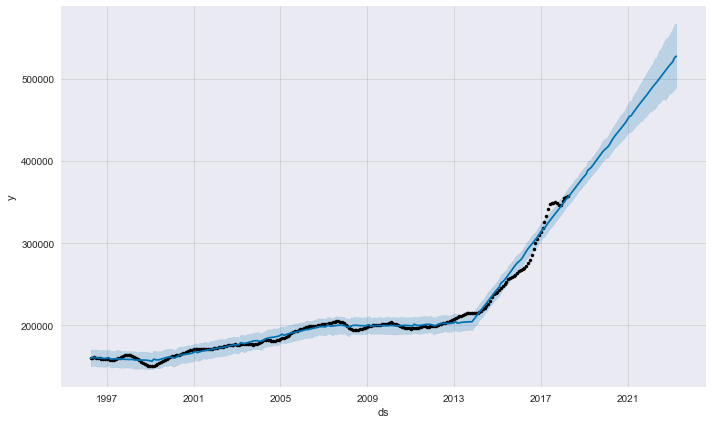

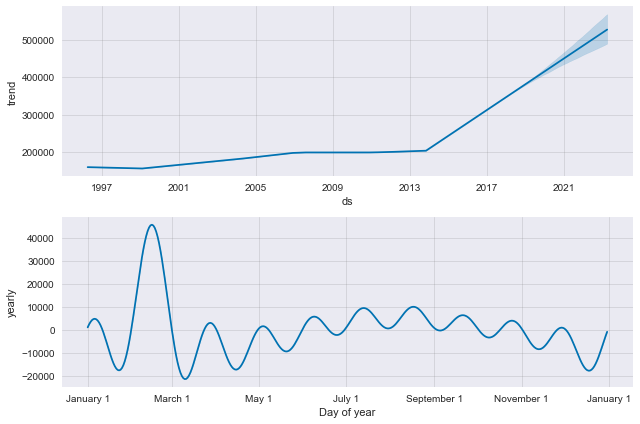

In [52]:
#FBProphet Model - 75218
Model = proph(interval_width=0.95)

Model.fit(dfw_75218)

future_dates = Model.make_future_dataframe(periods=60, freq='MS')
display(future_dates.tail())

forecast = Model.predict(future_dates)
display(forecast.head())

display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model.plot(forecast, uncertainty=True)
plt.show()

Model.plot_components(forecast)
plt.show()

In [53]:
yhat_increase_75218 = round(((forecast[(forecast['ds'] == '2023-04-01')]['yhat'].values - dfw_75218[dfw_75218['ds'] == '2018-04-01']['y'])/dfw_75218[dfw_75218['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_75218

22524    47.42
Name: y, dtype: float64

In [54]:
dfw_75218_cv = cross_validation(Model, initial='730 days', period='365 days', horizon = '1825 days')
dfw_75218_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,161155.701137,160181.471293,162136.641468,160200,1998-04-06
1,1998-06-01,161837.925911,159279.122869,164556.636998,158800,1998-04-06
2,1998-07-01,161682.982101,157412.411804,166412.856599,157200,1998-04-06
3,1998-08-01,160475.022312,153895.989018,167782.696773,155600,1998-04-06
4,1998-09-01,158743.347887,149854.815438,169433.149715,154000,1998-04-06


In [55]:
dfw_75218_p = performance_metrics(dfw_75218_cv)
dfw_75218_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,2.903306e+07,5388.233128,4134.231153,0.022346,0.468750
1,209 days,3.276902e+07,5724.422746,4346.311523,0.023683,0.468750
2,210 days,3.347745e+07,5785.970061,4475.261159,0.024423,0.510417
3,211 days,3.421666e+07,5849.500605,4542.081769,0.024745,0.520833
4,212 days,3.441939e+07,5866.804307,4570.128732,0.024880,0.510417


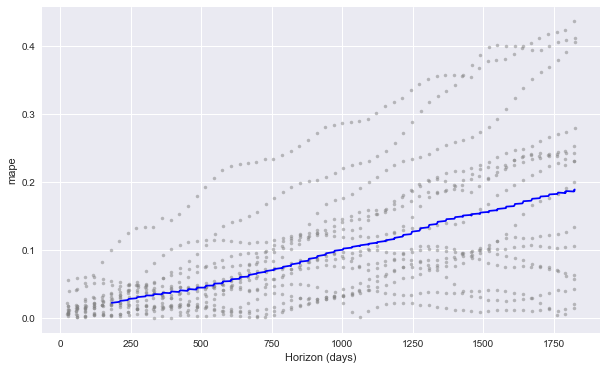

In [56]:
fig = plot_cross_validation_metric(dfw_75218_cv, metric='mape')

### Dallas-Fort Worth 75080

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56235,2022-12-01
56236,2023-01-01
56237,2023-02-01
56238,2023-03-01
56239,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,131578.802058,-69460.380435,348542.208413,131578.802058,131578.802058,151.662072,151.662072,151.662072,151.662072,151.662072,151.662072,0.0,0.0,0.0,131730.46413
1,1996-04-01,131578.802058,-77207.732397,349344.310449,131578.802058,131578.802058,151.662072,151.662072,151.662072,151.662072,151.662072,151.662072,0.0,0.0,0.0,131730.46413
2,1996-04-01,131578.802058,-76720.314740,330166.844675,131578.802058,131578.802058,151.662072,151.662072,151.662072,151.662072,151.662072,151.662072,0.0,0.0,0.0,131730.46413
3,1996-04-01,131578.802058,-80241.425901,335826.373479,131578.802058,131578.802058,151.662072,151.662072,151.662072,151.662072,151.662072,151.662072,0.0,0.0,0.0,131730.46413
4,1996-04-01,131578.802058,-72811.229004,344222.538488,131578.802058,131578.802058,151.662072,151.662072,151.662072,151.662072,151.662072,151.662072,0.0,0.0,0.0,131730.46413


,ds,yhat,yhat_lower,yhat_upper
56235,2022-12-01,338344.188721,126530.587620,553888.520040
56236,2023-01-01,339842.796730,133602.396673,557531.421456
56237,2023-02-01,341418.653471,130593.170045,541752.094204
56238,2023-03-01,343344.212878,148100.990183,542900.003493
56239,2023-04-01,344681.357995,119000.871447,539443.550152


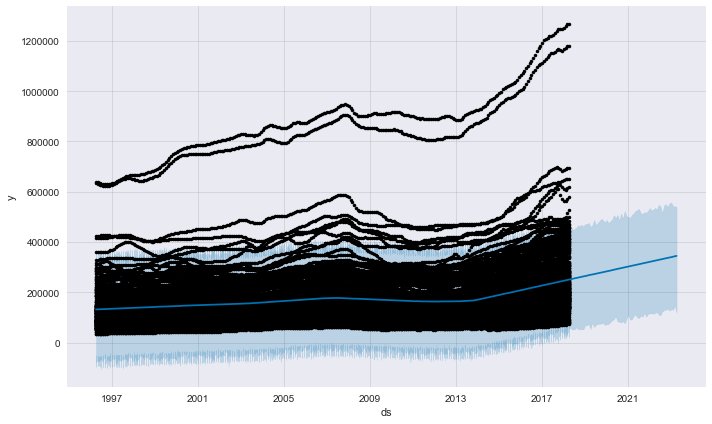

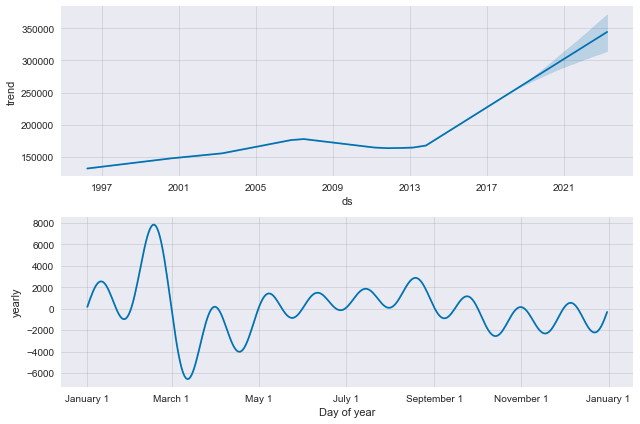

In [57]:
#FBProphet Model - 75080
Model_2 = proph(interval_width=0.95)

Model_2.fit(dfw_75080)

future_dates_2 = Model_2.make_future_dataframe(periods=60, freq='MS')
display(future_dates_2.tail())

forecast_2 = Model_2.predict(future_dates_2)
display(forecast_2.head())

display(forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_2.plot(forecast_2, uncertainty=True)
plt.show()

Model_2.plot_components(forecast_2)
plt.show()

In [58]:
yhat_increase_75080 = round(((forecast_2[(forecast_2['ds'] == '2023-04-01')]['yhat'].values - dfw_75080[dfw_75080['ds'] == '2018-04-01']['y'])/dfw_75080[dfw_75080['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_75080

264        0.73
529       18.73
794       48.44
1059      29.38
1324      -4.04
1589      11.40
1854     -18.46
2119     -16.16
2384     -19.54
2649      22.88
2914     -16.88
3179      -6.18
3444       1.50
3709      13.76
3974     -13.72
4239     -19.88
4504      -5.93
4769      16.33
5034     -26.30
5299      90.96
5564     119.96
5829      98.21
6094      79.06
6359      55.68
6624      25.66
6889     110.94
7154     145.32
7419      71.40
7684      24.57
7949      74.26
          ...  
48494      8.90
48759    109.02
49024    135.44
49289     97.19
49554     70.89
49819    144.28
50084    109.66
50349    232.70
50614     37.16
50879     70.55
51144     69.54
51409     33.55
51674     97.19
51939     61.07
52204     46.92
52469     27.75
52734     93.42
52999     38.43
53264    -13.53
53529     44.82
53794     37.16
54059     59.13
54324    -11.44
54589     72.17
54854     81.32
55119     58.77
55384     -8.72
55649     80.94
55914    117.60
56179    106.03
Name: y, Length: 212, dt

In [59]:
dfw_75080_cv = cross_validation(Model_2, initial='730 days', period='365 days', horizon = '1825 days')
dfw_75080_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,136662.821357,-34832.575827,304122.062157,375700,1998-04-06
1,1998-05-01,136662.821357,-17573.619580,309138.983031,266300,1998-04-06
2,1998-05-01,136662.821357,-34121.933148,306375.889438,59600,1998-04-06
3,1998-05-01,136662.821357,-30871.920890,305640.229830,209300,1998-04-06
4,1998-05-01,136662.821357,-27506.063397,299851.247294,138000,1998-04-06


In [60]:
dfw_75080_p = performance_metrics(dfw_75080_cv)
dfw_75080_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,9.863702e+09,99316.171451,63321.434167,0.445113,0.961134
1,209 days,9.870320e+09,99349.482056,63322.821444,0.444807,0.961085
2,210 days,9.872432e+09,99360.114712,63320.047883,0.444615,0.961085
3,211 days,9.891164e+09,99454.332105,63387.097127,0.444811,0.961085
4,212 days,9.883716e+09,99416.879735,63393.305257,0.445337,0.961134


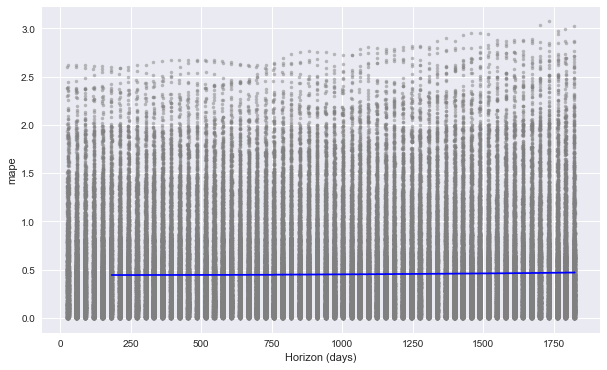

In [61]:
fig = plot_cross_validation_metric(dfw_75080_cv, metric='mape')

### Dallas-Fort Worth 75234

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,83893.258429,72665.563312,96682.078571,83893.258429,83893.258429,635.567006,635.567006,635.567006,635.567006,635.567006,635.567006,0.0,0.0,0.0,84528.825435
1,1996-05-01,84354.642702,73162.585655,96962.927427,84354.642702,84354.642702,1068.854829,1068.854829,1068.854829,1068.854829,1068.854829,1068.854829,0.0,0.0,0.0,85423.497531
2,1996-06-01,84831.406451,73869.161944,98773.056894,84831.406451,84831.406451,1441.286250,1441.286250,1441.286250,1441.286250,1441.286250,1441.286250,0.0,0.0,0.0,86272.692701
3,1996-07-01,85292.790724,73530.519864,98860.754482,85292.790724,85292.790724,1446.272673,1446.272673,1446.272673,1446.272673,1446.272673,1446.272673,0.0,0.0,0.0,86739.063397
4,1996-08-01,85769.554473,74766.213514,97826.976647,85769.554473,85769.554473,1123.315576,1123.315576,1123.315576,1123.315576,1123.315576,1123.315576,0.0,0.0,0.0,86892.870050


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,325281.569223,298798.853060,353277.302300
321,2023-01-01,326815.080813,299948.216833,355819.140782
322,2023-02-01,328374.144253,300924.866763,356434.876352
323,2023-03-01,333543.354351,303416.998126,364900.943046
324,2023-04-01,333828.734118,304922.538837,364775.317331


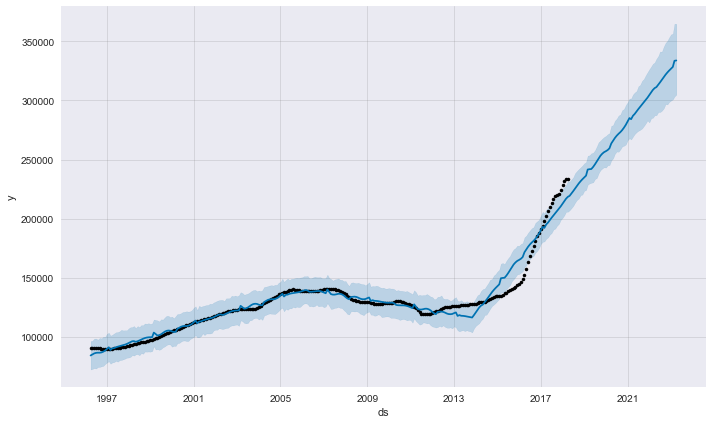

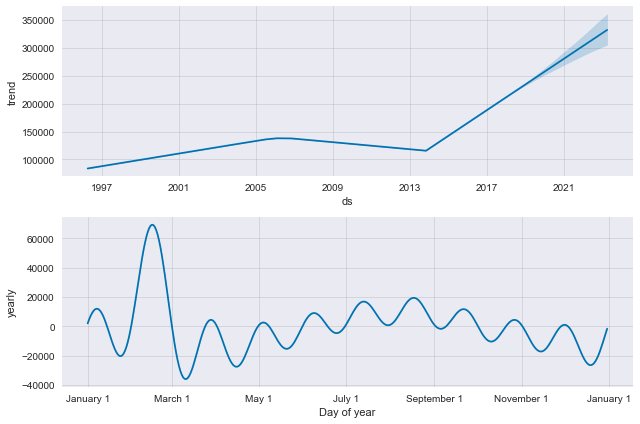

In [62]:
#FBProphet Model - 75234
Model_3 = proph(interval_width=0.95)

Model_3.fit(dfw_75234)

future_dates_3 = Model_3.make_future_dataframe(periods=60, freq='MS')
display(future_dates_3.tail())

forecast_3 = Model_3.predict(future_dates_3)
display(forecast_3.head())

display(forecast_3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_3.plot(forecast_3, uncertainty=True)
plt.show()

Model_3.plot_components(forecast_3)
plt.show()

In [63]:
yhat_increase_75234 = round(((forecast_3[(forecast_3['ds'] == '2023-04-01')]['yhat'].values - dfw_75234[dfw_75234['ds'] == '2018-04-01']['y'])/dfw_75234[dfw_75234['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_75234

25704    42.66
Name: y, dtype: float64

In [64]:
dfw_75234_cv = cross_validation(Model_3, initial='730 days', period='365 days', horizon = '1825 days')
dfw_75234_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,94233.557375,93943.000815,94496.716845,94400,1998-04-06
1,1998-06-01,94530.073407,93725.504397,95281.957528,94800,1998-04-06
2,1998-07-01,95167.889804,93706.376404,96691.860996,95200,1998-04-06
3,1998-08-01,95707.907330,93418.277128,97981.301026,95600,1998-04-06
4,1998-09-01,95935.390405,92830.512268,99011.185446,95900,1998-04-06


In [65]:
dfw_75234_p = performance_metrics(dfw_75234_cv)
dfw_75234_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,1.556566e+07,3945.334481,2958.107460,0.023248,0.395833
1,209 days,1.567089e+07,3958.647553,2987.554330,0.023531,0.406250
2,210 days,1.581068e+07,3976.264947,3023.792517,0.023828,0.437500
3,211 days,1.679123e+07,4097.710292,3153.025564,0.024754,0.416667
4,212 days,1.722533e+07,4150.340756,3210.091089,0.025236,0.406250


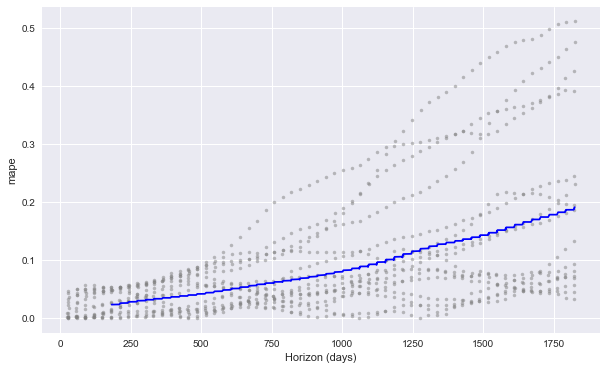

In [66]:
fig = plot_cross_validation_metric(dfw_75234_cv, metric='mape')

### Dallas-Fort Worth 75081

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,119437.535586,110637.719853,128694.980323,119437.535586,119437.535586,288.861584,288.861584,288.861584,288.861584,288.861584,288.861584,0.0,0.0,0.0,119726.397170
1,1996-05-01,119716.453898,110849.533953,129975.256384,119716.453898,119716.453898,698.189915,698.189915,698.189915,698.189915,698.189915,698.189915,0.0,0.0,0.0,120414.643813
2,1996-06-01,120004.669487,111404.304943,129595.262424,120004.669487,120004.669487,727.860965,727.860965,727.860965,727.860965,727.860965,727.860965,0.0,0.0,0.0,120732.530451
3,1996-07-01,120283.587798,111917.388966,130319.497945,120283.587798,120283.587798,696.374673,696.374673,696.374673,696.374673,696.374673,696.374673,0.0,0.0,0.0,120979.962471
4,1996-08-01,120571.803387,112047.550303,130929.786529,120571.803387,120571.803387,742.488663,742.488663,742.488663,742.488663,742.488663,742.488663,0.0,0.0,0.0,121314.292050


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,384832.883991,360804.372273,409680.739674
321,2023-01-01,386659.478611,362249.666794,412358.973908
322,2023-02-01,388554.166688,362631.623744,414133.164426
323,2023-03-01,392414.429235,366581.361998,418046.563787
324,2023-04-01,393405.185499,367281.713214,420764.876779


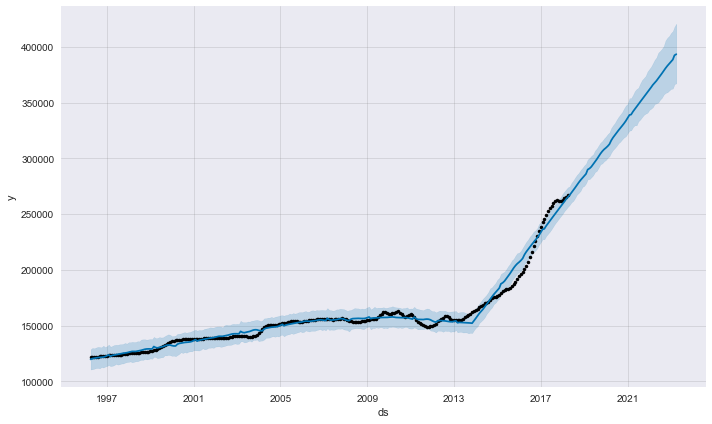

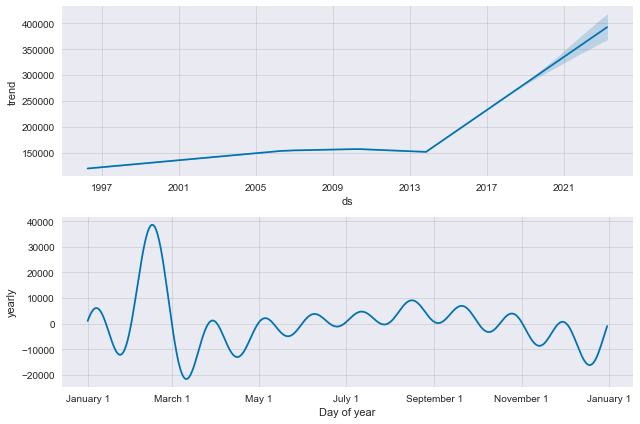

In [67]:
#FBProphet Model - 75081
Model_4 = proph(interval_width=0.95)

Model_4.fit(dfw_75081)

future_dates_4 = Model_4.make_future_dataframe(periods=60, freq='MS')
display(future_dates_4.tail())

forecast_4 = Model_4.predict(future_dates_4)
display(forecast_4.head())

display(forecast_4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_4.plot(forecast_4, uncertainty=True)
plt.show()

Model_4.plot_components(forecast_4)
plt.show()

In [68]:
yhat_increase_75081 = round(((forecast_4[(forecast_4['ds'] == '2023-04-01')]['yhat'].values - dfw_75081[dfw_75081['ds'] == '2018-04-01']['y'])/dfw_75081[dfw_75081['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_75081

11924    47.29
Name: y, dtype: float64

In [69]:
dfw_75081_cv = cross_validation(Model_4, initial='730 days', period='365 days', horizon = '1825 days')
dfw_75081_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,125525.832531,124975.108105,125958.714031,125500,1998-04-06
1,1998-06-01,125260.487523,123903.700877,126510.857366,125700,1998-04-06
2,1998-07-01,125323.059180,123054.980733,127532.004386,125800,1998-04-06
3,1998-08-01,124724.646353,121324.233810,128161.877198,125900,1998-04-06
4,1998-09-01,124968.693346,120239.207923,129511.359989,126000,1998-04-06


In [70]:
dfw_75081_p = performance_metrics(dfw_75081_cv)
dfw_75081_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,1.693188e+07,4114.836034,2909.473725,0.019208,0.427083
1,209 days,1.716929e+07,4143.583925,2966.735478,0.019639,0.427083
2,210 days,1.743067e+07,4175.005276,3024.652018,0.020056,0.437500
3,211 days,1.748949e+07,4182.043603,3043.755519,0.020174,0.447917
4,212 days,1.922831e+07,4385.009862,3141.267166,0.020818,0.458333


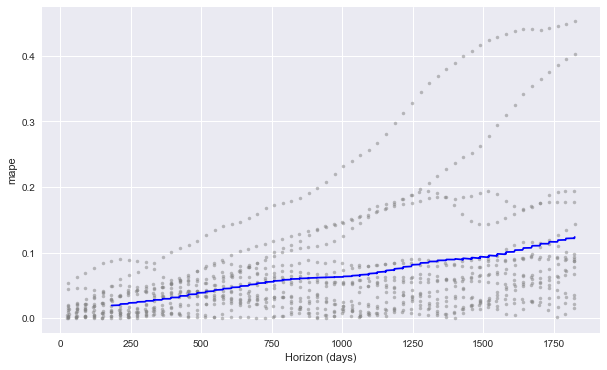

In [71]:
fig = plot_cross_validation_metric(dfw_75081_cv, metric='mape')

### Dallas-Fort Worth 75235

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,60296.838170,52068.443442,68911.451984,60296.838170,60296.838170,13.504520,13.504520,13.504520,13.504520,13.504520,13.504520,0.0,0.0,0.0,60310.342690
1,1996-05-01,60642.998860,52530.298019,69980.268934,60642.998860,60642.998860,417.319183,417.319183,417.319183,417.319183,417.319183,417.319183,0.0,0.0,0.0,61060.318043
2,1996-06-01,61000.698239,53034.571562,70382.073868,61000.698239,61000.698239,655.402528,655.402528,655.402528,655.402528,655.402528,655.402528,0.0,0.0,0.0,61656.100767
3,1996-07-01,61346.858929,52974.398154,70705.304450,61346.858929,61346.858929,810.092321,810.092321,810.092321,810.092321,810.092321,810.092321,0.0,0.0,0.0,62156.951250
4,1996-08-01,61704.558309,53570.564030,71460.276246,61704.558309,61704.558309,862.280702,862.280702,862.280702,862.280702,862.280702,862.280702,0.0,0.0,0.0,62566.839010


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,261923.137289,235878.139548,287940.959465
321,2023-01-01,263234.130103,238878.977486,289205.342546
322,2023-02-01,264521.559703,237979.201957,291237.743073
323,2023-03-01,268006.829982,241692.096903,294702.092976
324,2023-04-01,268671.663022,241609.409868,295582.172901


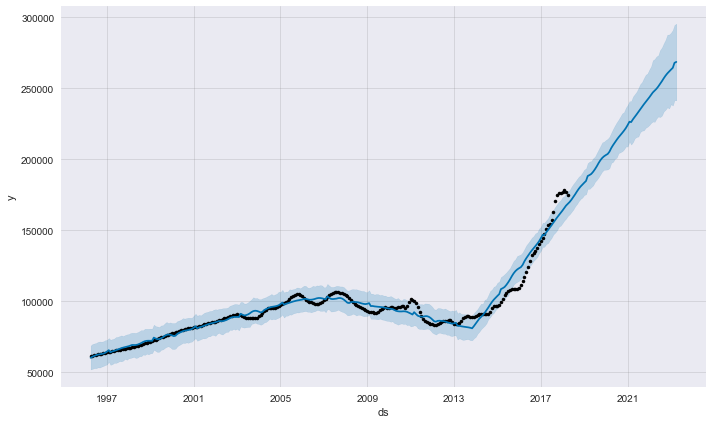

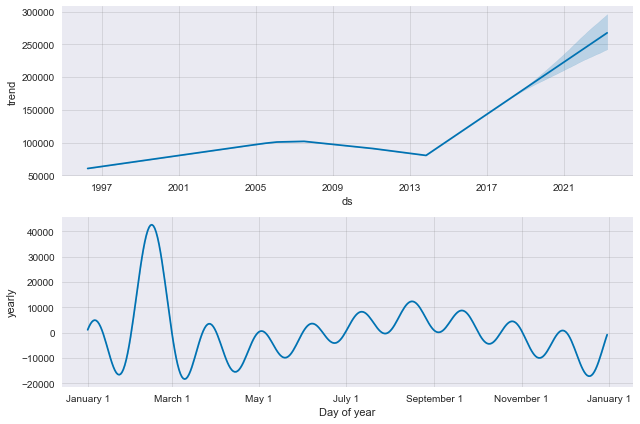

In [72]:
#FBProphet Model - 75235
Model_5 = proph(interval_width=0.95)

Model_5.fit(dfw_75235)

future_dates_5 = Model_5.make_future_dataframe(periods=60, freq='MS')
display(future_dates_5.tail())

forecast_5 = Model_5.predict(future_dates_5)
display(forecast_5.head())

display(forecast_5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_5.plot(forecast_5, uncertainty=True)
plt.show()

Model_5.plot_components(forecast_5)
plt.show()

In [73]:
yhat_increase_75235 = round(((forecast_5[(forecast_5['ds'] == '2023-04-01')]['yhat'].values - dfw_75235[dfw_75235['ds'] == '2018-04-01']['y'])/dfw_75235[dfw_75235['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_75235

25969    53.79
Name: y, dtype: float64

In [74]:
dfw_75235_cv = cross_validation(Model_5, initial='730 days', period='365 days', horizon = '1825 days')
dfw_75235_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,68130.691864,68026.227922,68226.976659,68300,1998-04-06
1,1998-06-01,68418.548144,68111.243702,68690.751978,68700,1998-04-06
2,1998-07-01,68671.167336,68143.528916,69203.022269,69100,1998-04-06
3,1998-08-01,68968.900856,68113.310203,69783.282200,69500,1998-04-06
4,1998-09-01,69444.307759,68274.207161,70564.887443,69900,1998-04-06


In [75]:
dfw_75235_p = performance_metrics(dfw_75235_cv)
dfw_75235_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,2.037971e+07,4514.389687,3406.131821,0.036301,0.364583
1,209 days,2.038564e+07,4515.045477,3414.904653,0.036417,0.375000
2,210 days,2.071286e+07,4551.138700,3464.038523,0.036984,0.385417
3,211 days,2.159946e+07,4647.522369,3529.112297,0.037630,0.375000
4,212 days,2.326383e+07,4823.259646,3627.382449,0.038794,0.364583


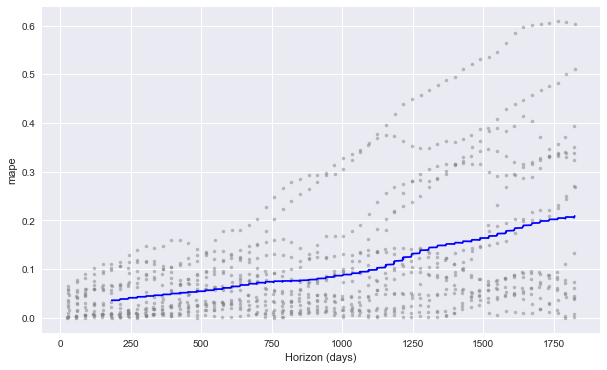

In [76]:
fig = plot_cross_validation_metric(dfw_75235_cv, metric='mape')

### Raleigh-Durham 27707

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,107740.255753,102591.488614,112192.778492,107740.255753,107740.255753,-37.603561,-37.603561,-37.603561,-37.603561,-37.603561,-37.603561,0.0,0.0,0.0,107702.652192
1,1996-05-01,108412.058905,104098.809502,113600.498398,108412.058905,108412.058905,341.985441,341.985441,341.985441,341.985441,341.985441,341.985441,0.0,0.0,0.0,108754.044346
2,1996-06-01,109106.255495,104860.991868,114543.699182,109106.255495,109106.255495,588.654036,588.654036,588.654036,588.654036,588.654036,588.654036,0.0,0.0,0.0,109694.909531
3,1996-07-01,109778.058647,105283.462632,115321.926642,109778.058647,109778.058647,554.008410,554.008410,554.008410,554.008410,554.008410,554.008410,0.0,0.0,0.0,110332.067058
4,1996-08-01,110472.255238,106242.399845,116023.483592,110472.255238,110472.255238,437.527863,437.527863,437.527863,437.527863,437.527863,437.527863,0.0,0.0,0.0,110909.783100


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,309385.311821,284943.308698,333285.019125
321,2023-01-01,310589.215287,285404.027246,335460.856893
322,2023-02-01,311804.689297,287273.599308,336217.244729
323,2023-03-01,314503.642520,288333.169393,338340.528473
324,2023-04-01,315242.369342,288010.562397,340875.301596


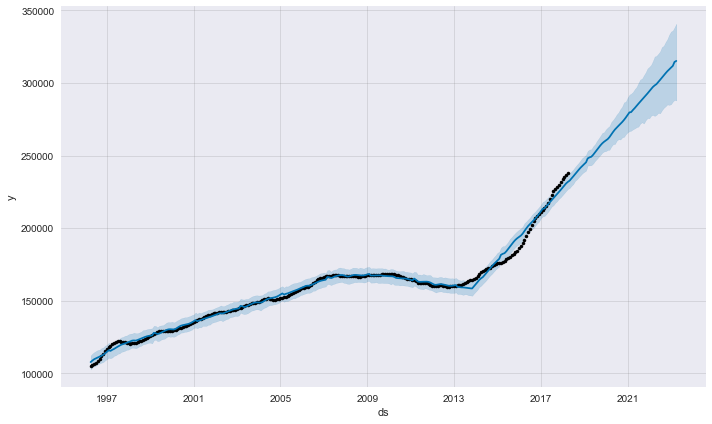

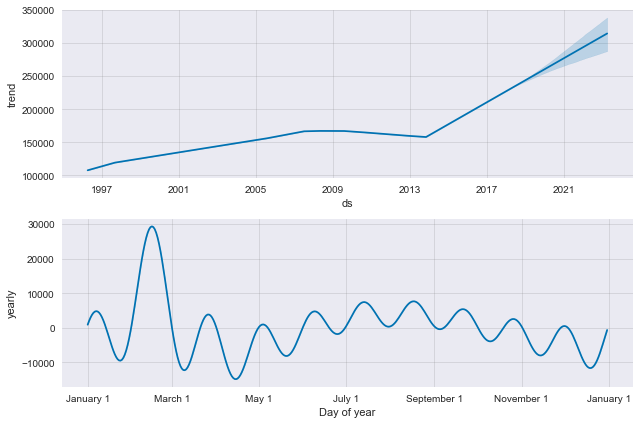

In [77]:
#FBProphet Model - 27707
Model_6 = proph(interval_width=0.95)

Model_6.fit(rdu_27707)

future_dates_6 = Model_6.make_future_dataframe(periods=60, freq='MS')
display(future_dates_6.tail())

forecast_6 = Model_6.predict(future_dates_6)
display(forecast_6.head())

display(forecast_6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_6.plot(forecast_6, uncertainty=True)
plt.show()

Model_6.plot_components(forecast_6)
plt.show()

In [78]:
yhat_increase_27707 = round(((forecast_6[(forecast_6['ds'] == '2023-04-01')]['yhat'].values - rdu_27707[rdu_27707['ds'] == '2018-04-01']['y'])/rdu_27707[rdu_27707['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_27707

4239    32.29
Name: y, dtype: float64

In [79]:
rdu_27707_cv = cross_validation(Model_6, initial='730 days', period='365 days', horizon = '1825 days')
rdu_27707_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,120107.918496,119693.050287,120464.976784,121000,1998-04-06
1,1998-06-01,119559.131461,118509.950212,120754.854527,121400,1998-04-06
2,1998-07-01,118281.580099,116461.191164,120425.830769,121900,1998-04-06
3,1998-08-01,118996.556915,116216.806146,122116.954011,122500,1998-04-06
4,1998-09-01,119146.264284,115382.537923,123198.310660,123000,1998-04-06


In [80]:
rdu_27707_p = performance_metrics(rdu_27707_cv)
rdu_27707_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,7.785372e+06,2790.227963,2174.568902,0.014121,0.489583
1,209 days,8.089732e+06,2844.245407,2238.967546,0.014629,0.500000
2,210 days,8.277670e+06,2877.094070,2293.548180,0.015016,0.541667
3,211 days,8.916556e+06,2986.060318,2426.004251,0.015836,0.541667
4,212 days,9.349898e+06,3057.760232,2481.592604,0.016174,0.541667


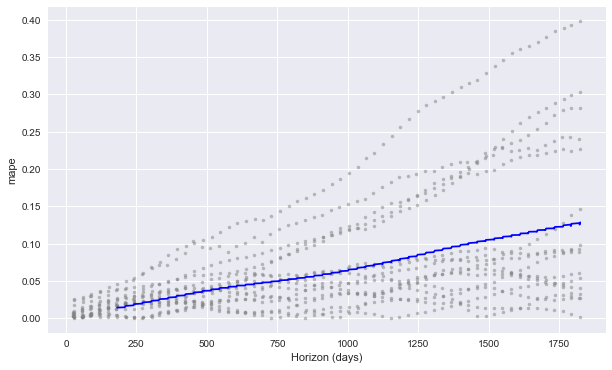

In [81]:
fig = plot_cross_validation_metric(rdu_27707_cv, metric='mape')

### Raleigh-Durham 27609

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,143480.813725,138034.917430,149135.582707,143480.813725,143480.813725,-79.696990,-79.696990,-79.696990,-79.696990,-79.696990,-79.696990,0.0,0.0,0.0,143401.116735
1,1996-05-01,143796.072782,137956.824759,149989.092012,143796.072782,143796.072782,280.057669,280.057669,280.057669,280.057669,280.057669,280.057669,0.0,0.0,0.0,144076.130451
2,1996-06-01,144121.840475,138586.170401,150533.169520,144121.840475,144121.840475,473.054807,473.054807,473.054807,473.054807,473.054807,473.054807,0.0,0.0,0.0,144594.895282
3,1996-07-01,144437.099532,139660.830337,150617.372685,144437.099532,144437.099532,554.804519,554.804519,554.804519,554.804519,554.804519,554.804519,0.0,0.0,0.0,144991.904052
4,1996-08-01,144762.867225,139620.394012,150681.630617,144762.867225,144762.867225,480.975543,480.975543,480.975543,480.975543,480.975543,480.975543,0.0,0.0,0.0,145243.842768


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,433911.671702,388692.154194,481610.486703
321,2023-01-01,435670.028038,388397.967941,484740.891775
322,2023-02-01,437371.365142,390030.494074,485720.071475
323,2023-03-01,440432.137103,393510.152751,494808.239033
324,2023-04-01,441811.867195,393319.694885,497098.448742


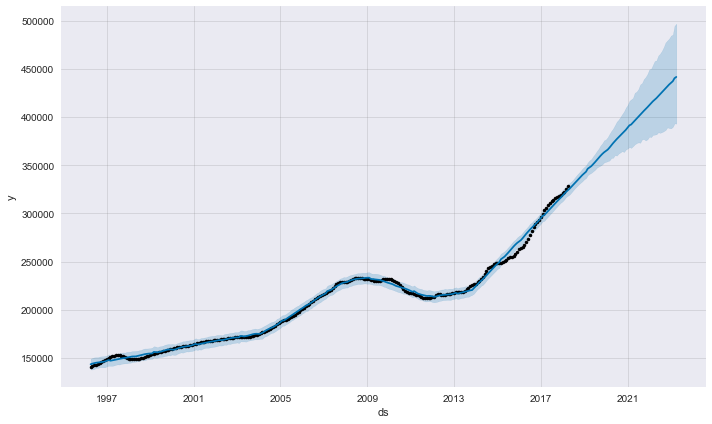

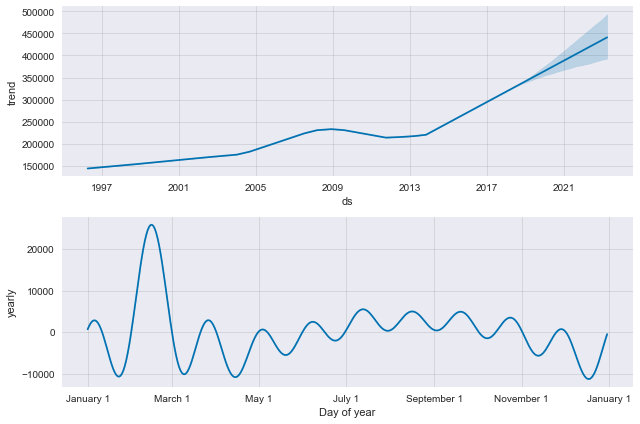

In [82]:
#FBProphet Model - 27609
Model_7 = proph(interval_width=0.95)

Model_7.fit(rdu_27609)

future_dates_7 = Model_7.make_future_dataframe(periods=60, freq='MS')
display(future_dates_7.tail())

forecast_7 = Model_7.predict(future_dates_7)
display(forecast_7.head())

display(forecast_7[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_7.plot(forecast_7, uncertainty=True)
plt.show()

Model_7.plot_components(forecast_7)
plt.show()

In [83]:
yhat_increase_27609 = round(((forecast_7[(forecast_7['ds'] == '2023-04-01')]['yhat'].values - rdu_27609[rdu_27609['ds'] == '2018-04-01']['y'])/rdu_27609[rdu_27609['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_27609

1324    34.58
Name: y, dtype: float64

In [84]:
rdu_27609_cv = cross_validation(Model_7, initial='730 days', period='365 days', horizon = '1825 days')
rdu_27609_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,148193.297363,147778.718383,148614.205385,148400,1998-04-06
1,1998-06-01,147138.483192,146062.760361,148446.049255,148600,1998-04-06
2,1998-07-01,145814.293968,143923.614803,147929.088168,149000,1998-04-06
3,1998-08-01,146135.773074,143468.297347,149125.001973,149600,1998-04-06
4,1998-09-01,145626.547171,141954.967560,149743.486632,150200,1998-04-06


In [85]:
rdu_27609_p = performance_metrics(rdu_27609_cv)
rdu_27609_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,3.484550e+07,5903.007943,4360.419685,0.020994,0.333333
1,209 days,3.556363e+07,5963.525071,4469.587801,0.021701,0.333333
2,210 days,3.558440e+07,5965.266127,4485.644891,0.021799,0.364583
3,211 days,3.635836e+07,6029.789464,4576.006831,0.022261,0.364583
4,212 days,4.091426e+07,6396.425274,4812.208890,0.023328,0.364583


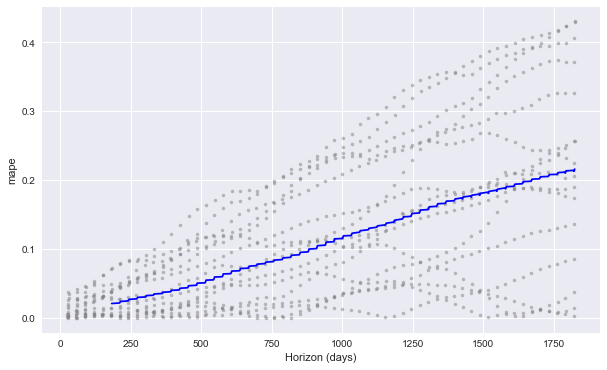

In [86]:
fig = plot_cross_validation_metric(rdu_27609_cv, metric='mape')

### Raleigh-Durham 27705

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,114801.646251,111791.272638,118021.520605,114801.646251,114801.646251,-28.394840,-28.394840,-28.394840,-28.394840,-28.394840,-28.394840,0.0,0.0,0.0,114773.251411
1,1996-05-01,115834.830041,112810.481411,118970.934643,115834.830041,115834.830041,-11.606640,-11.606640,-11.606640,-11.606640,-11.606640,-11.606640,0.0,0.0,0.0,115823.223401
2,1996-06-01,116902.453292,113583.718055,120293.249430,116902.453292,116902.453292,-24.675381,-24.675381,-24.675381,-24.675381,-24.675381,-24.675381,0.0,0.0,0.0,116877.777911
3,1996-07-01,117935.637083,114772.101860,121022.029793,117935.637083,117935.637083,-57.380732,-57.380732,-57.380732,-57.380732,-57.380732,-57.380732,0.0,0.0,0.0,117878.256350
4,1996-08-01,119003.260333,115969.554984,122627.842710,119003.260333,119003.260333,31.696428,31.696428,31.696428,31.696428,31.696428,31.696428,0.0,0.0,0.0,119034.956761


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,346198.780748,309214.154666,379904.824262
321,2023-01-01,347552.702708,309522.323087,383130.504253
322,2023-02-01,349004.976510,310270.572886,384643.229068
323,2023-03-01,350501.763829,309494.570536,387089.081815
324,2023-04-01,351733.758639,310765.451085,389717.864329


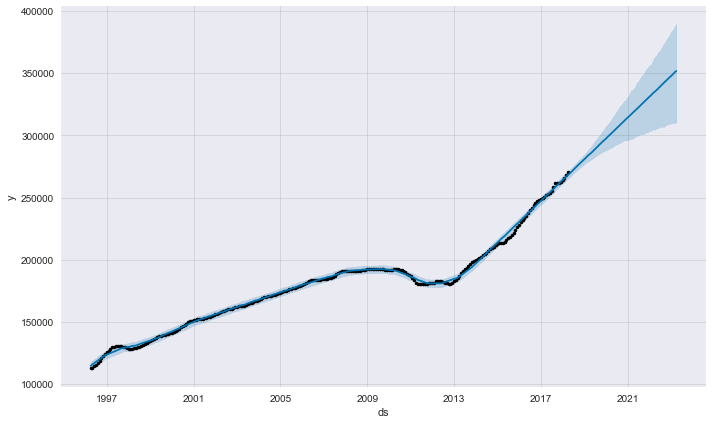

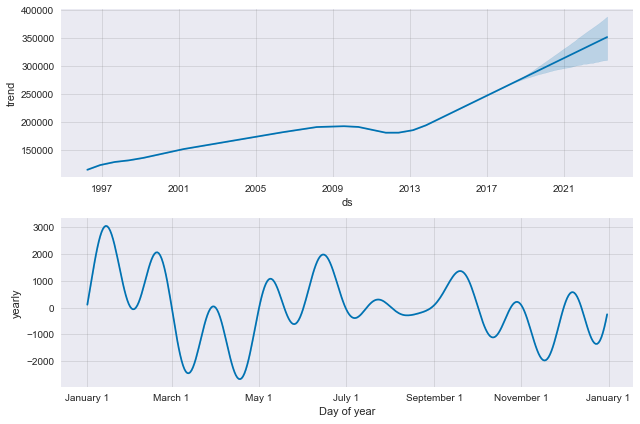

In [87]:
#FBProphet Model - 27705
Model_8 = proph(interval_width=0.95)

Model_8.fit(rdu_27705)

future_dates_8 = Model_8.make_future_dataframe(periods=60, freq='MS')
display(future_dates_8.tail())

forecast_8 = Model_8.predict(future_dates_8)
display(forecast_8.head())

display(forecast_8[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_8.plot(forecast_8, uncertainty=True)
plt.show()

Model_8.plot_components(forecast_8)
plt.show()

In [88]:
yhat_increase_27705 = round(((forecast_8[(forecast_8['ds'] == '2023-04-01')]['yhat'].values - rdu_27705[rdu_27705['ds'] == '2018-04-01']['y'])/rdu_27705[rdu_27705['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_27705

3974    30.18
Name: y, dtype: float64

In [89]:
rdu_27705_cv = cross_validation(Model_8, initial='730 days', period='365 days', horizon = '1825 days')
rdu_27705_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,126989.334420,126547.815964,127484.160593,129000,1998-04-06
1,1998-06-01,126579.575563,125286.337905,127994.117818,129500,1998-04-06
2,1998-07-01,126702.068982,124397.994738,129382.793327,130100,1998-04-06
3,1998-08-01,126425.222728,122627.929102,130543.585021,130700,1998-04-06
4,1998-09-01,126863.241298,121529.476047,132346.127246,131300,1998-04-06


In [90]:
rdu_27705_p = performance_metrics(rdu_27705_cv)
rdu_27705_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,2.203137e+07,4693.758137,2942.748170,0.016819,0.437500
1,209 days,2.252196e+07,4745.730277,3010.179214,0.017314,0.447917
2,210 days,2.286494e+07,4781.729623,3071.247649,0.017713,0.489583
3,211 days,2.280797e+07,4775.768858,3042.678260,0.017552,0.520833
4,212 days,2.306805e+07,4802.920765,3115.666327,0.017930,0.510417


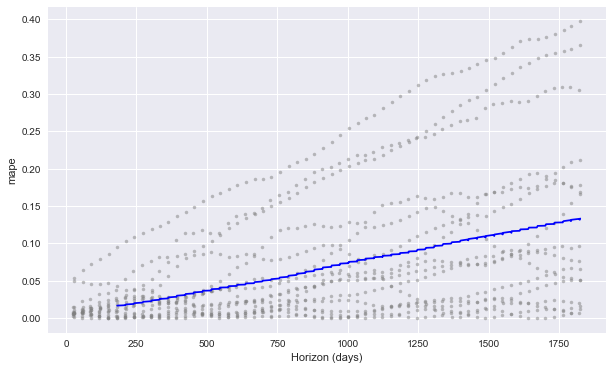

In [91]:
fig = plot_cross_validation_metric(rdu_27705_cv, metric='mape')

### Raleigh-Durham 27704

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,87747.934064,83180.856652,92570.630193,87747.934064,87747.934064,-41.484473,-41.484473,-41.484473,-41.484473,-41.484473,-41.484473,0.0,0.0,0.0,87706.449590
1,1996-05-01,88088.952075,83336.545803,93362.970257,88088.952075,88088.952075,376.495053,376.495053,376.495053,376.495053,376.495053,376.495053,0.0,0.0,0.0,88465.447128
2,1996-06-01,88441.337353,83986.267126,94210.621411,88441.337353,88441.337353,654.706291,654.706291,654.706291,654.706291,654.706291,654.706291,0.0,0.0,0.0,89096.043643
3,1996-07-01,88782.355363,84678.194223,94481.234885,88782.355363,88782.355363,686.584725,686.584725,686.584725,686.584725,686.584725,686.584725,0.0,0.0,0.0,89468.940089
4,1996-08-01,89134.740641,84427.778029,94516.817961,89134.740641,89134.740641,485.065241,485.065241,485.065241,485.065241,485.065241,485.065241,0.0,0.0,0.0,89619.805882


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,204548.085356,183140.620216,225138.944003
321,2023-01-01,205258.889157,183610.382360,225784.395835
322,2023-02-01,205919.311404,185131.735296,226691.372242
323,2023-03-01,208263.338919,185310.071057,229598.944946
324,2023-04-01,208588.439279,185526.987934,229172.097269


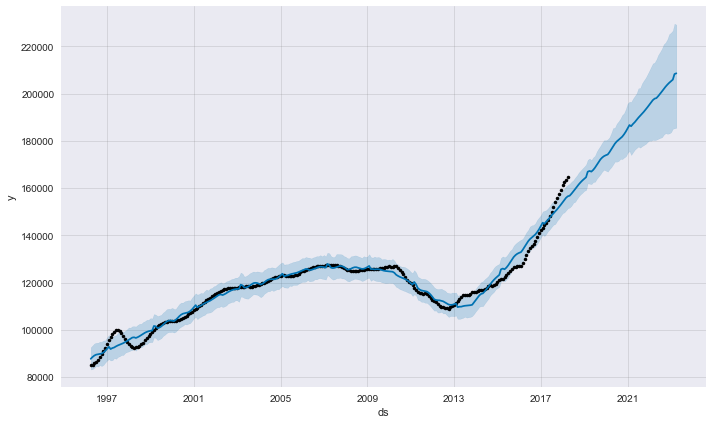

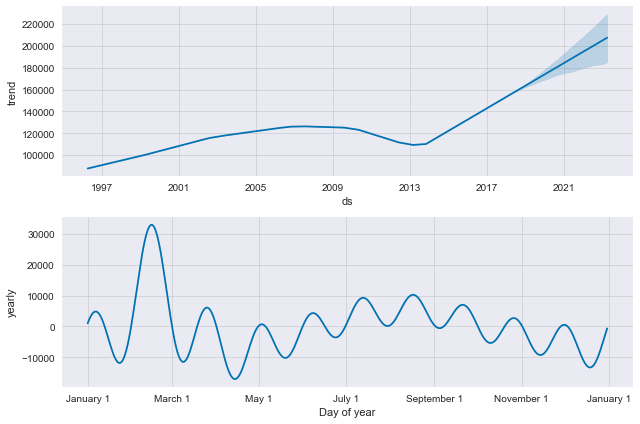

In [92]:
#FBProphet Model - 27704
Model_9= proph(interval_width=0.95)

Model_9.fit(rdu_27704)

future_dates_9 = Model.make_future_dataframe(periods=60, freq='MS')
display(future_dates_9.tail())

forecast_9 = Model_9.predict(future_dates_9)
display(forecast_9.head())

display(forecast_9[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_9.plot(forecast_9, uncertainty=True)
plt.show()

Model_9.plot_components(forecast_9)
plt.show()

In [93]:
yhat_increase_27704 = round(((forecast_9[(forecast_9['ds'] == '2023-04-01')]['yhat'].values - rdu_27704[rdu_27704['ds'] == '2018-04-01']['y'])/rdu_27704[rdu_27704['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_27704

3709    26.72
Name: y, dtype: float64

In [94]:
rdu_27704_cv = cross_validation(Model_9, initial='730 days', period='365 days', horizon = '1825 days')
rdu_27704_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,91388.936792,91105.783175,91686.396306,92500,1998-04-06
1,1998-06-01,89681.646901,88791.728784,90478.024071,92700,1998-04-06
2,1998-07-01,86972.245771,85573.491020,88377.748269,93200,1998-04-06
3,1998-08-01,87085.877126,84933.610318,89249.733495,93900,1998-04-06
4,1998-09-01,86522.777863,83383.301839,89485.703255,94600,1998-04-06


In [95]:
rdu_27704_p = performance_metrics(rdu_27704_cv)
rdu_27704_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,1.312387e+07,3622.688099,2548.961206,0.022604,0.562500
1,209 days,1.478407e+07,3845.006419,2688.405419,0.024026,0.572917
2,210 days,1.494432e+07,3865.787893,2742.719283,0.024498,0.604167
3,211 days,1.508725e+07,3884.230352,2786.588861,0.024849,0.635417
4,212 days,1.534717e+07,3917.546940,2832.247969,0.025237,0.635417


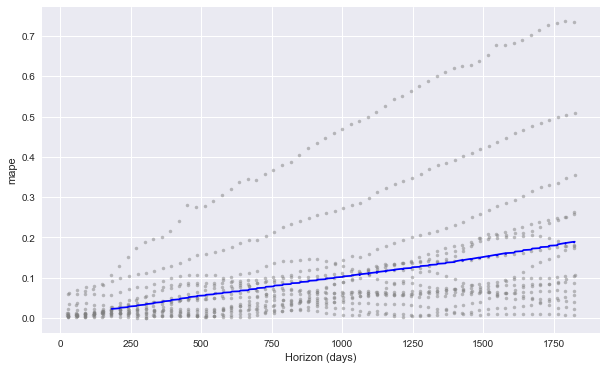

In [96]:
fig = plot_cross_validation_metric(rdu_27704_cv, metric='mape')

### Raleigh-Durham 27607

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,163502.336469,157865.335942,169720.232747,163502.336469,163502.336469,196.776125,196.776125,196.776125,196.776125,196.776125,196.776125,0.0,0.0,0.0,163699.112595
1,1996-05-01,164252.217648,158547.427121,170306.681495,164252.217648,164252.217648,458.386233,458.386233,458.386233,458.386233,458.386233,458.386233,0.0,0.0,0.0,164710.603880
2,1996-06-01,165027.094865,159573.348726,171688.308792,165027.094865,165027.094865,767.909768,767.909768,767.909768,767.909768,767.909768,767.909768,0.0,0.0,0.0,165795.004633
3,1996-07-01,165776.976044,160676.886789,172910.448288,165776.976044,165776.976044,893.842242,893.842242,893.842242,893.842242,893.842242,893.842242,0.0,0.0,0.0,166670.818286
4,1996-08-01,166551.853261,161120.297270,173189.372616,166551.853261,166551.853261,732.735547,732.735547,732.735547,732.735547,732.735547,732.735547,0.0,0.0,0.0,167284.588808


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,501547.490627,429207.343107,574192.123879
321,2023-01-01,503245.866104,429707.027274,577316.204071
322,2023-02-01,504821.911310,430028.826468,580183.851791
323,2023-03-01,508242.937399,431636.369854,584859.141230
324,2023-04-01,509523.232360,428546.028823,590179.831411


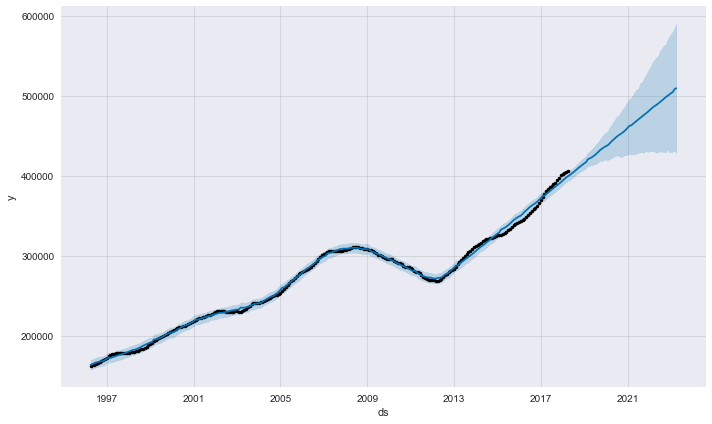

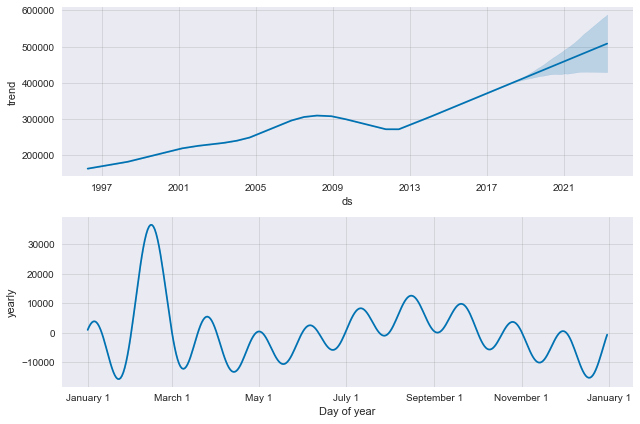

In [97]:
#FBProphet Model - 27607
Model_10 = proph(interval_width=0.95)

Model_10.fit(rdu_27607)

future_dates_10 = Model_10.make_future_dataframe(periods=60, freq='MS')
display(future_dates_10.tail())

forecast_10 = Model_10.predict(future_dates_10)
display(forecast_10.head())

display(forecast_10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_10.plot(forecast_10, uncertainty=True)
plt.show()

Model_10.plot_components(forecast_10)
plt.show()

In [98]:
yhat_increase_27607 = round(((forecast_10[(forecast_10['ds'] == '2023-04-01')]['yhat'].values - rdu_27607[rdu_27607['ds'] == '2018-04-01']['y'])/rdu_27607[rdu_27607['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_27607

1059    25.37
Name: y, dtype: float64

In [99]:
rdu_27607_cv = cross_validation(Model_10, initial='730 days', period='365 days', horizon = '1825 days')
rdu_27607_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,179376.581393,178924.228232,179833.401312,180500,1998-04-06
1,1998-06-01,178267.083344,176979.451717,179717.301225,181100,1998-04-06
2,1998-07-01,176603.629807,174230.235711,179129.661625,181900,1998-04-06
3,1998-08-01,174772.272381,171026.934446,178386.676757,182900,1998-04-06
4,1998-09-01,173370.632753,168203.075005,178263.995878,184000,1998-04-06


In [100]:
rdu_27607_p = performance_metrics(rdu_27607_cv)
rdu_27607_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,1.233907e+08,11108.135394,7466.922730,0.026993,0.270833
1,209 days,1.251792e+08,11188.352546,7591.784494,0.027659,0.281250
2,210 days,1.269068e+08,11265.293782,7778.508780,0.028454,0.281250
3,211 days,1.304862e+08,11423.053783,8031.352358,0.029316,0.270833
4,212 days,1.366104e+08,11688.046317,8307.387148,0.030272,0.270833


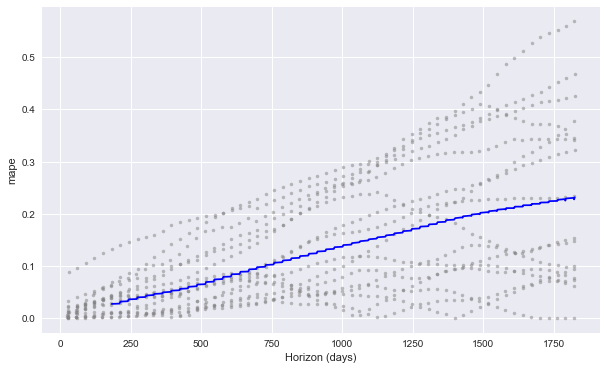

In [101]:
fig = plot_cross_validation_metric(rdu_27607_cv, metric='mape')

### Nashville 37211

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,97506.368771,92697.321891,103128.039947,97506.368771,97506.368771,55.004945,55.004945,55.004945,55.004945,55.004945,55.004945,0.0,0.0,0.0,97561.373716
1,1996-05-01,97976.609035,92645.720285,103449.779825,97976.609035,97976.609035,13.192928,13.192928,13.192928,13.192928,13.192928,13.192928,0.0,0.0,0.0,97989.801963
2,1996-06-01,98462.523974,93002.763925,104197.428806,98462.523974,98462.523974,145.245419,145.245419,145.245419,145.245419,145.245419,145.245419,0.0,0.0,0.0,98607.769394
3,1996-07-01,98932.764238,93879.797927,104590.875877,98932.764238,98932.764238,271.360629,271.360629,271.360629,271.360629,271.360629,271.360629,0.0,0.0,0.0,99204.124867
4,1996-08-01,99418.679178,93691.943907,104769.128096,99418.679178,99418.679178,176.527258,176.527258,176.527258,176.527258,176.527258,176.527258,0.0,0.0,0.0,99595.206435


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,379163.805201,342358.722305,417776.166305
321,2023-01-01,381194.746543,341848.295542,419704.362439
322,2023-02-01,383317.757302,342505.722227,423352.398307
323,2023-03-01,385869.034377,343673.513401,426662.107215
324,2023-04-01,387604.024075,344586.615104,430177.822458


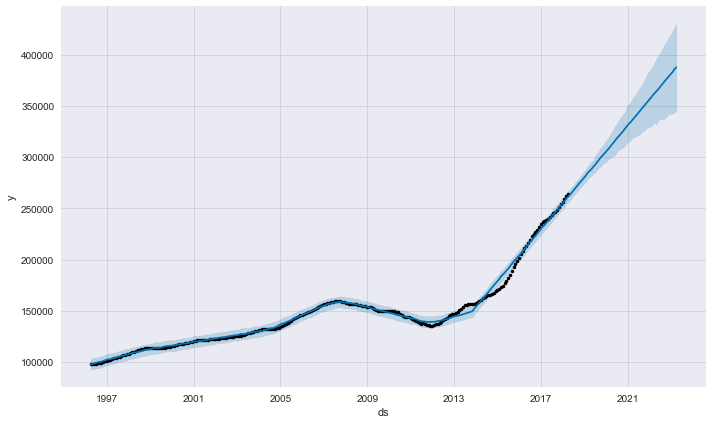

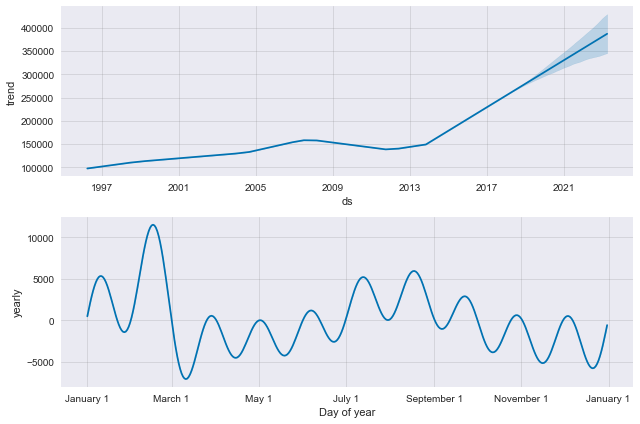

In [102]:
#FBProphet Model - 37211
Model_11 = proph(interval_width=0.95)

Model_11.fit(nash_37211)

future_dates_11 = Model_11.make_future_dataframe(periods=60, freq='MS')
display(future_dates_11.tail())

forecast_11 = Model_11.predict(future_dates_11)
display(forecast_11.head())

display(forecast_11[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_11.plot(forecast_11, uncertainty=True)
plt.show()

Model_11.plot_components(forecast_11)
plt.show()

In [103]:
yhat_increase_37211 = round(((forecast_11[(forecast_11['ds'] == '2023-04-01')]['yhat'].values - nash_37211[nash_37211['ds'] == '2018-04-01']['y'])/nash_37211[nash_37211['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_37211

1854    46.71
Name: y, dtype: float64

In [104]:
nash_37211_cv = cross_validation(Model_11, initial='730 days', period='365 days', horizon = '1825 days')
nash_37211_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,110461.795641,110111.794927,110867.691938,110700,1998-04-06
1,1998-06-01,110071.296744,109102.623738,111248.631867,111300,1998-04-06
2,1998-07-01,110646.619666,108934.332045,112776.965672,111900,1998-04-06
3,1998-08-01,111309.517464,108496.032933,114536.878418,112400,1998-04-06
4,1998-09-01,111982.063536,108156.691663,116700.094437,112900,1998-04-06


In [105]:
nash_37211_p = performance_metrics(nash_37211_cv)
nash_37211_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,3.445962e+07,5870.232078,3749.035439,0.025488,0.239583
1,209 days,3.447078e+07,5871.182277,3758.389456,0.025569,0.239583
2,210 days,3.459241e+07,5881.531060,3815.226836,0.026025,0.250000
3,211 days,3.551246e+07,5959.232874,3950.839957,0.026926,0.229167
4,212 days,3.679554e+07,6065.932959,4032.202867,0.027483,0.239583


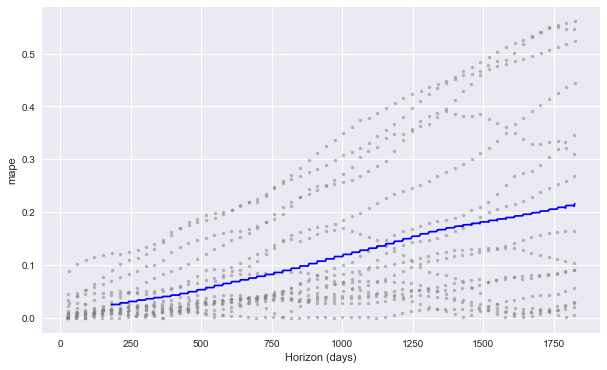

In [106]:
fig = plot_cross_validation_metric(nash_37211_cv, metric='mape')

### Nashville 37214

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,87332.989801,81586.613673,92780.799901,87332.989801,87332.989801,145.281345,145.281345,145.281345,145.281345,145.281345,145.281345,0.0,0.0,0.0,87478.271146
1,1996-05-01,87728.532030,82464.705652,93625.781066,87728.532030,87728.532030,367.387679,367.387679,367.387679,367.387679,367.387679,367.387679,0.0,0.0,0.0,88095.919709
2,1996-06-01,88137.258999,83088.005399,94214.316987,88137.258999,88137.258999,503.644706,503.644706,503.644706,503.644706,503.644706,503.644706,0.0,0.0,0.0,88640.903705
3,1996-07-01,88532.801227,83003.701542,94891.797294,88532.801227,88532.801227,412.943362,412.943362,412.943362,412.943362,412.943362,412.943362,0.0,0.0,0.0,88945.744589
4,1996-08-01,88941.528196,83770.239772,95090.324209,88941.528196,88941.528196,218.073243,218.073243,218.073243,218.073243,218.073243,218.073243,0.0,0.0,0.0,89159.601439


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,318901.832453,289984.300592,352975.856462
321,2023-01-01,320538.905248,291595.614929,353929.365288
322,2023-02-01,322220.366757,292363.249270,357434.997823
323,2023-03-01,325185.682778,293628.831149,362376.739768
324,2023-04-01,326470.070123,294310.077976,364331.824347


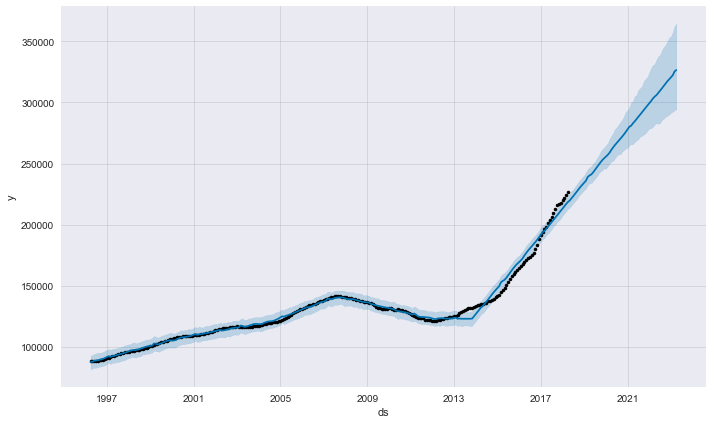

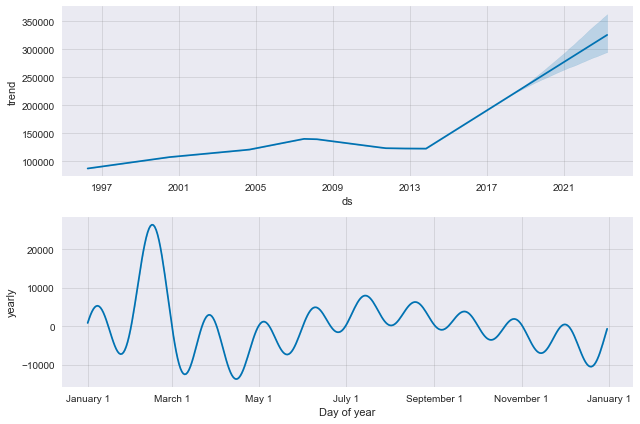

In [107]:
#FBProphet Model - 37214
Model_12 = proph(interval_width=0.95)

Model_12.fit(nash_37214)

future_dates_12 = Model_12.make_future_dataframe(periods=60, freq='MS')
display(future_dates_12.tail())

forecast_12 = Model_12.predict(future_dates_12)
display(forecast_12.head())

display(forecast_12[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_12.plot(forecast_12, uncertainty=True)
plt.show()

Model_12.plot_components(forecast_12)
plt.show()

In [108]:
yhat_increase_37214 = round(((forecast_12[(forecast_12['ds'] == '2023-04-01')]['yhat'].values - nash_37214[nash_37214['ds'] == '2018-04-01']['y'])/nash_37214[nash_37214['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_37214

2119    44.07
Name: y, dtype: float64

In [109]:
nash_37214_cv = cross_validation(Model_12, initial='730 days', period='365 days', horizon = '1825 days')
nash_37214_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,97604.689557,97294.726596,97945.721196,97400,1998-04-06
1,1998-06-01,97632.354542,96735.497316,98709.114587,97600,1998-04-06
2,1998-07-01,97558.006653,95932.987936,99381.012224,97900,1998-04-06
3,1998-08-01,97285.531331,94700.336209,100026.721171,98100,1998-04-06
4,1998-09-01,96564.059211,92939.620211,100219.572514,98500,1998-04-06


In [110]:
nash_37214_p = performance_metrics(nash_37214_cv)
nash_37214_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,1.575105e+07,3968.758662,2728.148720,0.021340,0.354167
1,209 days,1.585503e+07,3981.837694,2765.916514,0.021714,0.354167
2,210 days,1.594199e+07,3992.742576,2809.021349,0.022100,0.375000
3,211 days,1.650700e+07,4062.880251,2897.951645,0.022760,0.375000
4,212 days,1.755631e+07,4190.025099,2971.163149,0.023318,0.385417


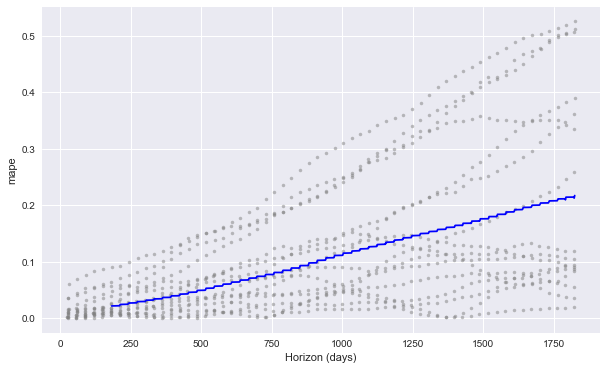

In [111]:
fig = plot_cross_validation_metric(nash_37214_cv, metric='mape')

### Nashville 37217

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,95945.879761,91869.779132,99903.105018,95945.879761,95945.879761,64.569200,64.569200,64.569200,64.569200,64.569200,64.569200,0.0,0.0,0.0,96010.448961
1,1996-05-01,96343.642819,92372.258970,100600.386628,96343.642819,96343.642819,90.360643,90.360643,90.360643,90.360643,90.360643,90.360643,0.0,0.0,0.0,96434.003463
2,1996-06-01,96754.664647,92552.483394,101216.798197,96754.664647,96754.664647,175.822310,175.822310,175.822310,175.822310,175.822310,175.822310,0.0,0.0,0.0,96930.486957
3,1996-07-01,97152.427705,93267.629380,101569.519433,97152.427705,97152.427705,282.268763,282.268763,282.268763,282.268763,282.268763,282.268763,0.0,0.0,0.0,97434.696468
4,1996-08-01,97563.449533,93763.488125,101998.713034,97563.449533,97563.449533,211.782272,211.782272,211.782272,211.782272,211.782272,211.782272,0.0,0.0,0.0,97775.231805


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,297180.306940,266348.113753,332468.404559
321,2023-01-01,298752.759151,266863.971832,335584.565642
322,2023-02-01,300387.857020,268001.658551,337497.053196
323,2023-03-01,302639.404171,267621.079892,341002.253829
324,2023-04-01,304040.702968,268400.945366,343196.033333


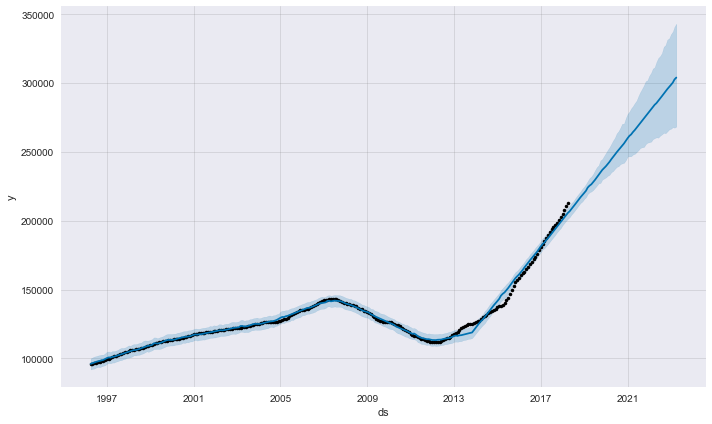

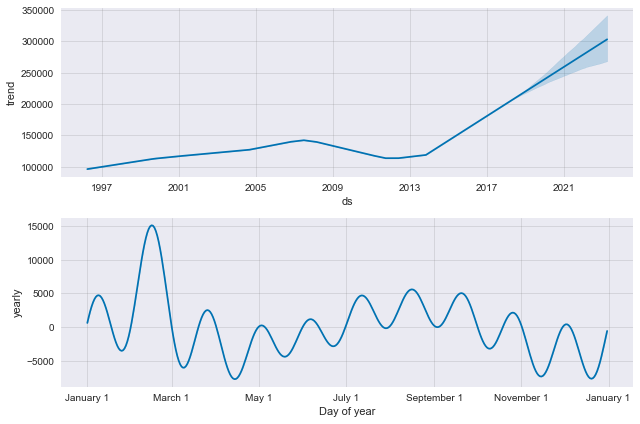

In [112]:
#FBProphet Model - 37217
Model_13 = proph(interval_width=0.95)

Model_13.fit(nash_37217)

future_dates_13 = Model_13.make_future_dataframe(periods=60, freq='MS')
display(future_dates_13.tail())

forecast_13 = Model_13.predict(future_dates_13)
display(forecast_13.head())

display(forecast_13[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_13.plot(forecast_13, uncertainty=True)
plt.show()

Model_13.plot_components(forecast_13)
plt.show()

In [113]:
yhat_increase_37217 = round(((forecast_13[(forecast_13['ds'] == '2023-04-01')]['yhat'].values - nash_37217[nash_37217['ds'] == '2018-04-01']['y'])/nash_37217[nash_37217['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_37217

2384    42.74
Name: y, dtype: float64

In [114]:
nash_37217_cv = cross_validation(Model_13, initial='730 days', period='365 days', horizon = '1825 days')
nash_37217_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,106451.502103,106206.131062,106709.937846,106700,1998-04-06
1,1998-06-01,106517.950152,105847.900178,107257.876608,106900,1998-04-06
2,1998-07-01,106502.532688,105301.709869,107944.033078,107100,1998-04-06
3,1998-08-01,106557.605384,104718.825626,108772.090226,107400,1998-04-06
4,1998-09-01,107044.632093,104356.132400,110258.543624,107800,1998-04-06


In [115]:
nash_37217_p = performance_metrics(nash_37217_cv)
nash_37217_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,2.402083e+07,4901.104757,2893.639837,0.022865,0.489583
1,209 days,2.405066e+07,4904.146971,2912.515204,0.023036,0.500000
2,210 days,2.407782e+07,4906.915857,2937.223766,0.023242,0.520833
3,211 days,2.484628e+07,4984.603974,3068.496593,0.024190,0.520833
4,212 days,2.611779e+07,5110.556336,3142.148482,0.024772,0.520833


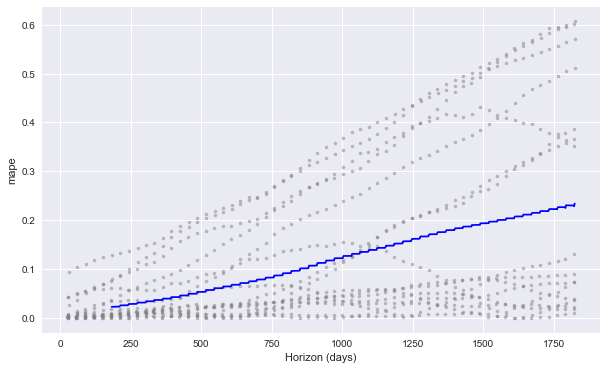

In [116]:
fig = plot_cross_validation_metric(nash_37217_cv, metric='mape')

### Nashville 37115

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,79480.581938,76379.254452,82850.275765,79480.581938,79480.581938,96.083579,96.083579,96.083579,96.083579,96.083579,96.083579,0.0,0.0,0.0,79576.665517
1,1996-05-01,79742.367606,76567.239212,82902.121417,79742.367606,79742.367606,62.879064,62.879064,62.879064,62.879064,62.879064,62.879064,0.0,0.0,0.0,79805.246670
2,1996-06-01,80012.879463,76720.998621,83187.709232,80012.879463,80012.879463,88.440066,88.440066,88.440066,88.440066,88.440066,88.440066,0.0,0.0,0.0,80101.319529
3,1996-07-01,80274.665131,76961.680633,83716.764490,80274.665131,80274.665131,134.166764,134.166764,134.166764,134.166764,134.166764,134.166764,0.0,0.0,0.0,80408.831895
4,1996-08-01,80545.176988,77385.911782,83915.378508,80545.176988,80545.176988,164.895751,164.895751,164.895751,164.895751,164.895751,164.895751,0.0,0.0,0.0,80710.072739


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,275553.595573,240402.832918,310443.777994
321,2023-01-01,277132.727315,240945.266877,312866.796318
322,2023-02-01,278725.749590,242374.160100,315772.658960
323,2023-03-01,280790.939040,243655.580633,317377.971519
324,2023-04-01,282141.785509,242816.174829,320436.521197


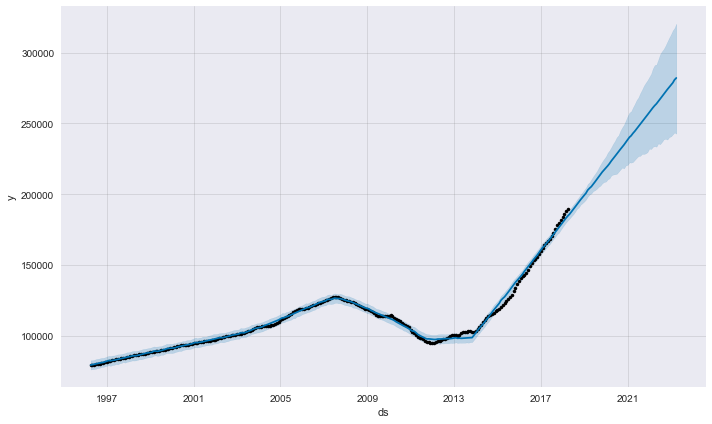

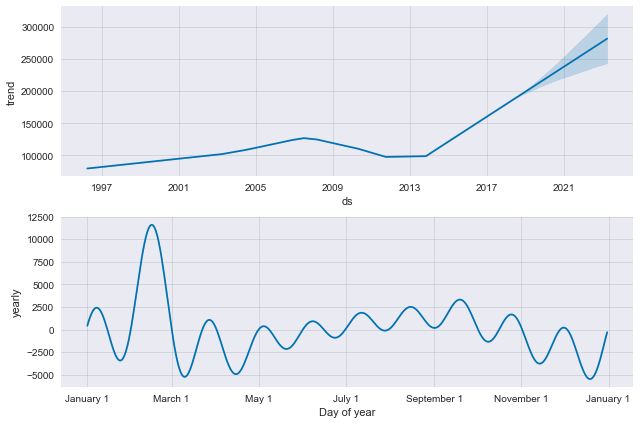

In [117]:
#FBProphet Model - 37115
Model_14 = proph(interval_width=0.95)

Model_14.fit(nash_37115)

future_dates_14 = Model_14.make_future_dataframe(periods=60, freq='MS')
display(future_dates_14.tail())

forecast_14 = Model_14.predict(future_dates_14)
display(forecast_14.head())

display(forecast_14[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_14.plot(forecast_14, uncertainty=True)
plt.show()

Model_14.plot_components(forecast_14)
plt.show()

In [118]:
yhat_increase_37115 = round(((forecast_14[(forecast_14['ds'] == '2023-04-01')]['yhat'].values - nash_37115[nash_37115['ds'] == '2018-04-01']['y'])/nash_37115[nash_37115['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_37115

1059    48.65
Name: y, dtype: float64

In [119]:
nash_37115_cv = cross_validation(Model_14, initial='730 days', period='365 days', horizon = '1825 days')
nash_37115_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,88270.461952,87622.478571,89008.706997,86600,1998-04-06
1,1998-06-01,89922.827353,87845.396781,91974.298740,86800,1998-04-06
2,1998-07-01,90150.788471,86606.680773,93760.534699,87000,1998-04-06
3,1998-08-01,88585.594680,83075.395310,93985.135558,87200,1998-04-06
4,1998-09-01,88715.916384,81191.737455,96546.151366,87400,1998-04-06


In [120]:
nash_37115_p = performance_metrics(nash_37115_cv)
nash_37115_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,1.932161e+07,4395.634836,2896.251028,0.027168,0.343750
1,209 days,1.931898e+07,4395.336283,2900.078021,0.027205,0.354167
2,210 days,1.935438e+07,4399.361511,2924.317616,0.027441,0.385417
3,211 days,1.970424e+07,4438.946298,2992.058115,0.027980,0.375000
4,212 days,2.072681e+07,4552.670281,3076.467380,0.028748,0.364583


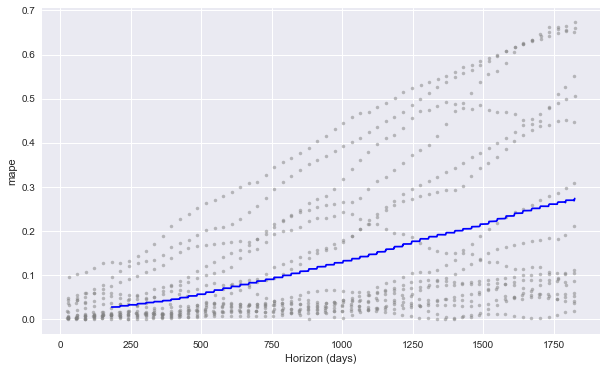

In [121]:
fig = plot_cross_validation_metric(nash_37115_cv, metric='mape')

### Nashville 37138

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
320,2022-12-01
321,2023-01-01
322,2023-02-01
323,2023-03-01
324,2023-04-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-01,104964.418919,100744.975217,108858.360082,104964.418919,104964.418919,22.174613,22.174613,22.174613,22.174613,22.174613,22.174613,0.0,0.0,0.0,104986.593531
1,1996-05-01,105405.907571,101581.615447,109454.713515,105405.907571,105405.907571,167.701730,167.701730,167.701730,167.701730,167.701730,167.701730,0.0,0.0,0.0,105573.609301
2,1996-06-01,105862.112512,102254.524736,110144.985448,105862.112512,105862.112512,333.118907,333.118907,333.118907,333.118907,333.118907,333.118907,0.0,0.0,0.0,106195.231419
3,1996-07-01,106303.601165,102546.836401,110448.975798,106303.601165,106303.601165,409.655119,409.655119,409.655119,409.655119,409.655119,409.655119,0.0,0.0,0.0,106713.256284
4,1996-08-01,106759.806106,103162.907898,111349.458999,106759.806106,106759.806106,341.293337,341.293337,341.293337,341.293337,341.293337,341.293337,0.0,0.0,0.0,107101.099443


,ds,yhat,yhat_lower,yhat_upper
320,2022-12-01,315029.522412,282815.899160,347498.741745
321,2023-01-01,316497.895717,283218.304432,350926.168958
322,2023-02-01,317966.390097,283043.097414,352488.630491
323,2023-03-01,320385.560600,285385.599469,356108.634455
324,2023-04-01,321640.705283,286360.427717,358112.866736


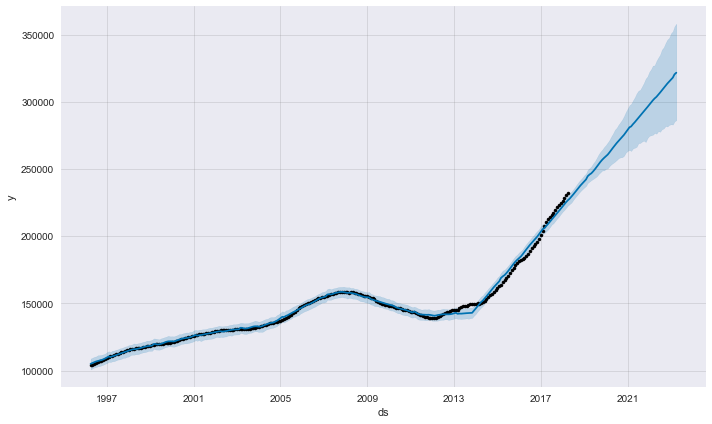

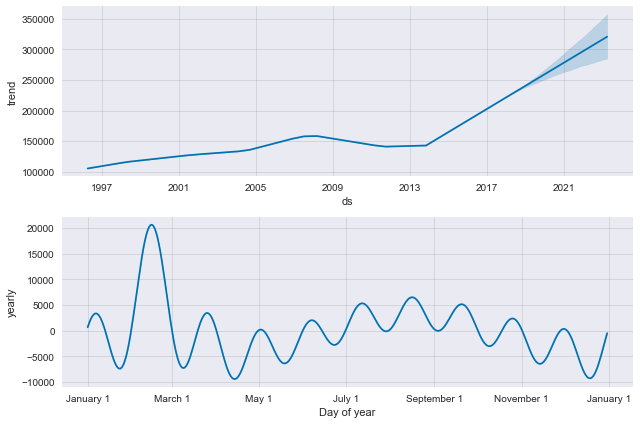

In [122]:
#FBProphet Model - 37138
Model_15 = proph(interval_width=0.95)

Model_15.fit(nash_37138)

future_dates_15 = Model_15.make_future_dataframe(periods=60, freq='MS')
display(future_dates_15.tail())

forecast_15 = Model_15.predict(future_dates_15)
display(forecast_15.head())

display(forecast_15[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Model_15.plot(forecast_15, uncertainty=True)
plt.show()

Model_15.plot_components(forecast_15)
plt.show()

In [123]:
yhat_increase_37138 = round(((forecast_15[(forecast_15['ds'] == '2023-04-01')]['yhat'].values - nash_37138[nash_37138['ds'] == '2018-04-01']['y'])/nash_37138[nash_37138['ds'] == '2018-04-01']['y'])*100,2)
yhat_increase_37138

1324    38.4
Name: y, dtype: float64

In [124]:
nash_37138_cv = cross_validation(Model_15, initial='730 days', period='365 days', horizon = '1825 days')
nash_37138_cv.head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 1998-04-06 00:00:00 and 2013-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-01,118050.242563,117376.264377,118830.968041,116500,1998-04-06
1,1998-06-01,118591.575664,116601.004390,120696.678668,116700,1998-04-06
2,1998-07-01,119420.024044,115840.621345,122969.515099,116900,1998-04-06
3,1998-08-01,118666.641173,113247.373997,124096.544017,117100,1998-04-06
4,1998-09-01,119037.986342,111265.545595,127101.633961,117400,1998-04-06


In [125]:
nash_37138_p = performance_metrics(nash_37138_cv)
nash_37138_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,182 days,1.476582e+07,3842.632191,2731.171803,0.018843,0.218750
1,209 days,1.484403e+07,3852.794702,2748.314345,0.018986,0.239583
2,210 days,1.489705e+07,3859.669773,2776.637842,0.019209,0.260417
3,211 days,1.546821e+07,3932.964875,2861.211849,0.019771,0.270833
4,212 days,1.661599e+07,4076.270981,2947.653613,0.020350,0.281250


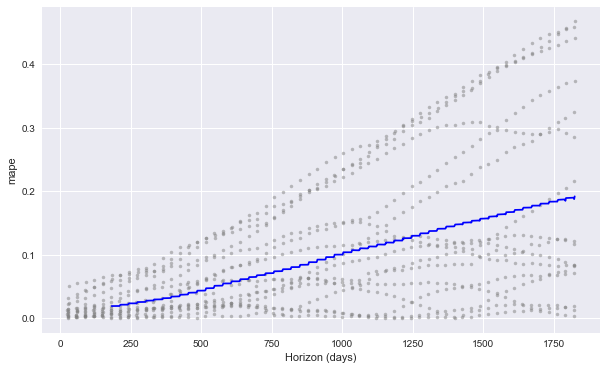

In [126]:
fig = plot_cross_validation_metric(nash_37138_cv, metric='mape')

## Interpreting Results

According to our models, we chose the following zipcodes because they exhibit high growth potential and a low amount of risk. These zipcodes have a projected growth between 47% and 54%:

Dallas-Fort Worth:
* 75235 - 53.78% Growth
* 75218 - 47.42% Growth
* 75081 - 47.28% Growth

Nashville:
* 37115 - 48.65% Growth
* 37211 - 46.70% Growth

Our models show that these zipcodes forecast excellent returns for the 5 year period 2018-2023. Although Raleigh-Durham was the number 1 market in the Emerging Trends in Real Estate Guide, none of the zipcodes were in the top 5 for growth.

## Recommendations

1. Select key investments in two cities: Dallas-Fort Worth and Nashville
2. Invest in 37115, 75235 for initial investments between $150K and $200K
3. Invest in 75218, 75081 and 37211 for initial investments between $200K and $400K
4. Rehab and sell properties immediately for quick return on investment
5. Rent properties not sold within 30 days of completed renovation for a period of 3-5 years, depending on market conditions
    * Median monthly rent of $1500 in Nashville
    * Median monthly rent of $1600 in Dallas-Fort Worth 

## Future Work

1. Identity New Markets for Expansion
    - Raleigh-Durham in Price Waterhouse Cooper Top 5 with more moderate returns between 25-34%
    - Brooklyn and Orlando in Price Waterhouse Cooper Top 5 with higher risk than considered for our current model. There is potential for good returns with a carefully crafted investment strategy 
2. Investigate Rental Opportunities
    - Properties may be purchased as long-term rentals in current areas of investment

## Appendix

<img src='Overall%20Real%20Estate%20Prospcts.png'  height=100% width=100%>

<img src= 'hottestMarkets_2019-9528a0.png' height=100% width=100%>